# Dataset Dự Đoán Nguy Cơ Đột Quỵ

## Bối Cảnh
Theo Tổ chức Y tế Thế giới (WHO), đột quỵ là nguyên nhân gây tử vong đứng thứ 2 trên toàn cầu, chiếm khoảng 11% tổng số ca tử vong. Bộ dữ liệu này được sử dụng để dự đoán khả năng bệnh nhân bị đột quỵ dựa trên các thông số đầu vào như giới tính, tuổi tác, các bệnh lý khác nhau và tình trạng hút thuốc. Mỗi dòng trong dữ liệu cung cấp thông tin liên quan về bệnh nhân.

## Thông Tin Các Thuộc Tính

1. **id**: Mã định danh duy nhất
2. **gender**: Giới tính
  - "Male" (Nam)  
  - "Female" (Nữ)
  - "Other" (Khác)
3. **age**: Tuổi của bệnh nhân
4. **hypertension**: Tình trạng huyết áp cao
  - 0: Không bị huyết áp cao
  - 1: Có bị huyết áp cao
5. **heart_disease**: Bệnh tim
  - 0: Không có bệnh tim
  - 1: Có bệnh tim
6. **ever_married**: Tình trạng hôn nhân
  - "No" (Chưa kết hôn)
  - "Yes" (Đã kết hôn)
7. **work_type**: Loại hình công việc
  - "children" (Trẻ em)
  - "Govt_job" (Công việc nhà nước)
  - "Never_worked" (Chưa từng làm việc)
  - "Private" (Tư nhân)
  - "Self-employed" (Tự kinh doanh)
8. **Residence_type**: Khu vực sinh sống
  - "Rural" (Nông thôn)
  - "Urban" (Thành thị)  
9. **avg_glucose_level**: Mức đường huyết trung bình trong máu
10. **bmi**: Chỉ số khối cơ thể
11. **smoking_status**: Tình trạng hút thuốc
   - "formerly smoked" (Đã từng hút thuốc)
   - "never smoked" (Chưa từng hút thuốc)
   - "smokes" (Đang hút thuốc)
   - "Unknown"* (Không xác định)
12. **stroke**: Tình trạng đột quỵ
   - 0: Không bị đột quỵ
   - 1: Đã bị đột quỵ

> *Lưu ý: "Unknown" trong smoking_status nghĩa là thông tin về tình trạng hút thuốc không có sẵn đối với bệnh nhân này.

# Import packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
sns.set_theme()

# setting to make numbers easier to read on display
pd.options.display.float_format = '{:20.2f}'.format

# show all columns on output
pd.set_option('display.max_columns', 999)

# Data Exploration

## Unzip dataset từ Kaggle

In [ ]:
import zipfile
import os

# Đường dẫn đến file zip
zip_path = '/content/archive.zip'

# Thư mục đích để giải nén
extract_path = '/content'

# Kiểm tra file tồn tại
if os.path.exists(zip_path):
    # Mở và giải nén file
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
        print("Đã giải nén file thành công!")

        # In ra danh sách các file đã giải nén
        print("\nCác file đã được giải nén:")
        for file in zip_ref.namelist():
            print(f"- {file}")
else:
    print(f"Không tìm thấy file {zip_path}")

Đã giải nén file thành công!

Các file đã được giải nén:
- healthcare-dataset-stroke-data.csv


In [ ]:
file_path = '/content/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(file_path)
df.sample(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2806,17270,Female,56.00,0,0,Yes,Private,Urban,82.12,32.50,smokes,0
3724,64189,Male,61.00,0,0,Yes,Self-employed,Rural,152.84,28.60,Unknown,0
2292,36589,Female,61.00,0,0,Yes,Self-employed,Urban,180.80,20.30,never smoked,0
2214,18680,Male,69.00,0,0,Yes,Self-employed,Urban,78.48,25.80,formerly smoked,0
5072,71957,Female,35.00,0,0,Yes,Private,Rural,58.72,40.00,smokes,0
3920,26197,Female,38.00,0,0,Yes,Private,Rural,104.03,47.30,smokes,0
4729,9143,Female,17.00,0,0,No,Private,Urban,67.87,24.90,formerly smoked,0
3689,29326,Female,75.00,0,0,Yes,Self-employed,Rural,70.22,24.80,formerly smoked,0
5032,67426,Female,1.24,0,0,No,children,Rural,61.94,20.30,Unknown,0
2079,55522,Female,4.00,0,0,No,children,Rural,206.25,17.00,Unknown,0


## Kích thước của dữ liệu

In [ ]:
df.shape

(5110, 12)

## Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## describe

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.00,36517.83,21161.72,67.00,17741.25,36932.00,54682.00,72940.00
age,5110.00,43.23,22.61,0.08,25.00,45.00,61.00,82.00
hypertension,5110.00,0.10,0.30,0.00,0.00,0.00,0.00,1.00
heart_disease,5110.00,0.05,0.23,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,5110.00,106.15,45.28,55.12,77.25,91.88,114.09,271.74
bmi,4909.00,28.89,7.85,10.30,23.50,28.10,33.10,97.60
stroke,5110.00,0.05,0.22,0.00,0.00,0.00,0.00,1.00


In [ ]:
df.describe(include = 'O').T

,count,unique,top,freq
gender,5110,3,Female,2994
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
Residence_type,5110,2,Urban,2596
smoking_status,5110,4,never smoked,1892


## Missing value

In [ ]:
df.isna().sum().to_frame()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


## Meaningless rows

In [ ]:
df[df['bmi'].isna()].head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.00,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.00,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.00,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.00,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
29,69160,Male,59.00,0,0,Yes,Private,Rural,211.78,NaN,formerly smoked,1
43,1845,Female,63.00,0,0,Yes,Private,Urban,90.90,NaN,formerly smoked,1
46,37937,Female,75.00,0,1,No,Self-employed,Urban,109.78,NaN,Unknown,1
50,18587,Female,76.00,0,0,No,Private,Urban,89.96,NaN,Unknown,1
51,15102,Male,78.00,1,0,Yes,Private,Urban,75.32,NaN,formerly smoked,1


### Percentage null

In [ ]:
percentage = (df['bmi'].isna().sum() / df.shape[0]) * 100
print(f'Percentage null of bmi: {percentage:.2f}%')

Percentage null of bmi: 3.93%


- Số lượng giá trị Null cột bmi không quá lớn, nên có thể xử lý bằng cách điền dựa theo những đặc điểm tương đồng

# Data Cleaning

In [ ]:
cleaned_df = df.copy()

## Handle missing values BMI

--
Các điều kiện được chọn có ý nghĩa về mặt y tế:

- Giới tính ảnh hưởng đến BMI
- Độ tuổi gần nhau (±5) thường có xu hướng BMI tương tự
- Glucose level liên quan đến chế độ ăn/lối sống, nên cũng liên quan đến BMI

In [ ]:
# Hàm điền giá trị thiếu cho BMI
def fill_bmi(row):
    if pd.isna(row['bmi']):
        # Tìm nhóm tương đồng mức 1 (match tất cả điều kiện)
        similar_group = df[
            (df['gender'] == row['gender']) &
            (abs(df['age'] - row['age']) <= 5) &
            (abs(df['avg_glucose_level'] - row['avg_glucose_level']) <= 20) &
            (df['smoking_status'] == row['smoking_status']) &
            (df['bmi'].notna())
        ]

        # Tìm nhóm tương đồng mức 2 (bỏ điều kiện smoking)
        if len(similar_group) < 5:
            similar_group = df[
                (df['gender'] == row['gender']) &
                (abs(df['age'] - row['age']) <= 5) &
                (abs(df['avg_glucose_level'] - row['avg_glucose_level']) <= 20) &
                (df['bmi'].notna())
            ]

        # Tìm nhóm tương đồng mức 3 (chỉ giữ gender và age)
        if len(similar_group) < 5:
            similar_group = df[
                (df['gender'] == row['gender']) &
                (abs(df['age'] - row['age']) <= 10) &
                (df['bmi'].notna())
            ]

        # Nếu không tìm được nhóm tương đồng nào, dùng median chung
        if len(similar_group) == 0:
            return df['bmi'].median()

        return similar_group['bmi'].median()
    return row['bmi']

In [ ]:
# Kiểm tra số lượng giá trị thiếu ban đầu
print("Số lượng NaN ban đầu:", cleaned_df['bmi'].isna().sum())
print("\nThống kê BMI trước khi điền:")
print(df['bmi'].describe())

# Áp dụng hàm để điền giá trị thiếu
cleaned_df['bmi'] = cleaned_df.apply(fill_bmi, axis=1)

# Kiểm tra kết quả sau khi điền
print("\nSố lượng NaN còn lại:", cleaned_df['bmi'].isna().sum())
print("\nThống kê BMI sau khi điền:")
print(cleaned_df['bmi'].describe())

Số lượng NaN ban đầu: 201

Thống kê BMI trước khi điền:
count                4909.00
mean                   28.89
std                     7.85
min                    10.30
25%                    23.50
50%                    28.10
75%                    33.10
max                    97.60
Name: bmi, dtype: float64

Số lượng NaN còn lại: 0

Thống kê BMI sau khi điền:
count                5110.00
mean                   28.91
std                     7.75
min                    10.30
25%                    23.70
50%                    28.20
75%                    33.00
max                    97.60
Name: bmi, dtype: float64


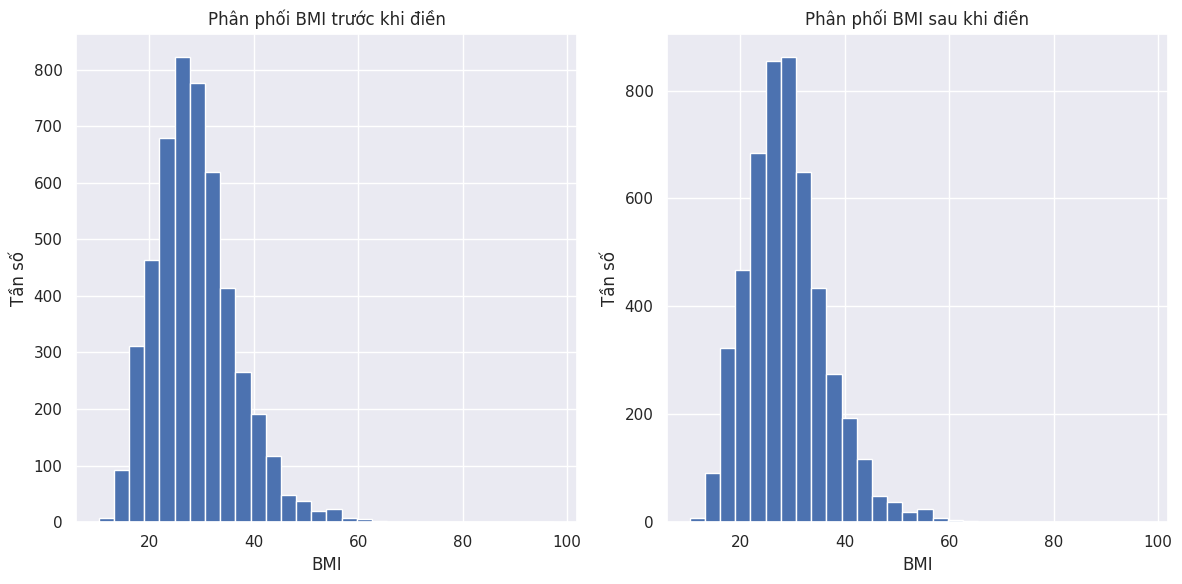

In [ ]:
# Vẽ histogram so sánh phân phối trước và sau khi điền
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Subplot cho phân phối BMI ban đầu
plt.subplot(1, 2, 1)
df['bmi'].hist(bins=30)
plt.title('Phân phối BMI trước khi điền')
plt.xlabel('BMI')
plt.ylabel('Tần số')

plt.subplot(1, 2, 2)
# Subplot cho phân phối BMI sau khi điền
cleaned_df['bmi'].hist(bins=30)
plt.title('Phân phối BMI sau khi điền')
plt.xlabel('BMI')
plt.ylabel('Tần số')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

# Feature Engineering

## Feature Classification: Categorical vs Numerical

In [ ]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### check unique value

In [ ]:
cleaned_df.nunique().to_frame()

,0
id,5110
gender,3
age,104
hypertension,2
heart_disease,2
ever_married,2
work_type,5
Residence_type,2
avg_glucose_level,3979
bmi,465


In [ ]:
# Convert simultaneously columns that belong categorical
def convert_dtype_category(df, features):
    for feature in features:
        df[feature] = df[feature].astype("category")

In [ ]:
numerical_features = ["id", "age", "avg_glucose_level", "bmi"]
categorical_features = ["gender", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "smoking_status", "stroke"]

In [ ]:
convert_dtype_category(cleaned_df, categorical_features)
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5110 non-null   int64   
 1   gender             5110 non-null   category
 2   age                5110 non-null   float64 
 3   hypertension       5110 non-null   category
 4   heart_disease      5110 non-null   category
 5   ever_married       5110 non-null   category
 6   work_type          5110 non-null   category
 7   Residence_type     5110 non-null   category
 8   avg_glucose_level  5110 non-null   float64 
 9   bmi                5110 non-null   float64 
 10  smoking_status     5110 non-null   category
 11  stroke             5110 non-null   category
dtypes: category(8), float64(3), int64(1)
memory usage: 200.9 KB


---
## Numerical

### Histogram for numerical

In [ ]:
cleaned_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5110 non-null   int64   
 1   gender             5110 non-null   category
 2   age                5110 non-null   float64 
 3   hypertension       5110 non-null   category
 4   heart_disease      5110 non-null   category
 5   ever_married       5110 non-null   category
 6   work_type          5110 non-null   category
 7   Residence_type     5110 non-null   category
 8   avg_glucose_level  5110 non-null   float64 
 9   bmi                5110 non-null   float64 
 10  smoking_status     5110 non-null   category
 11  stroke             5110 non-null   category
dtypes: category(8), float64(3), int64(1)
memory usage: 200.9 KB


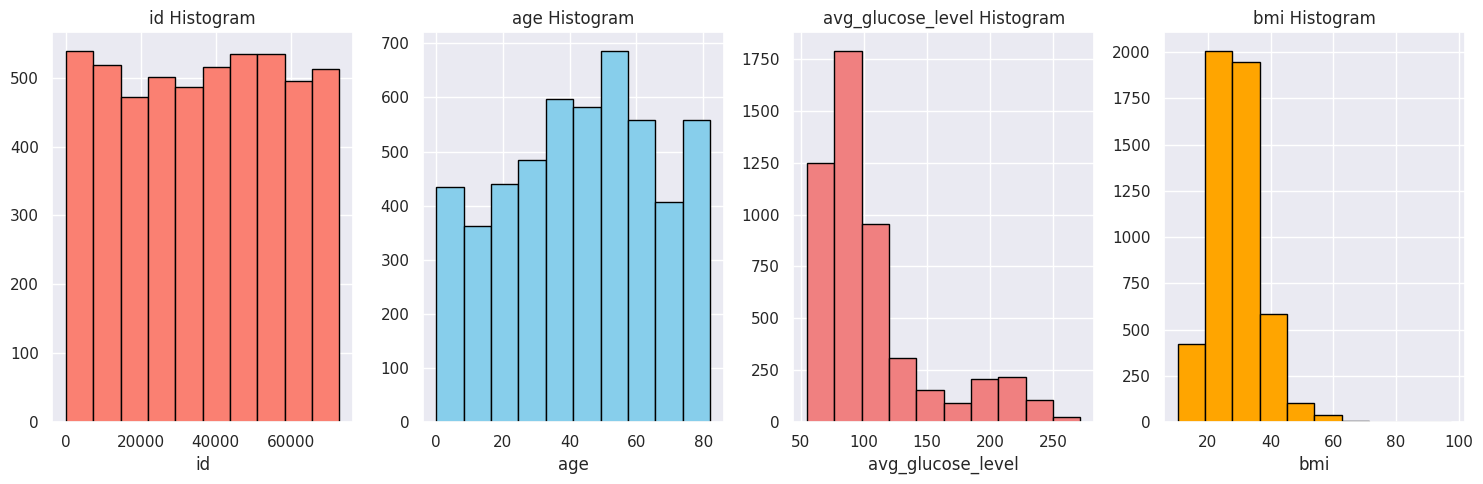

In [ ]:
import random
import matplotlib.pyplot as plt

colors = ["skyblue", "lightgreen", "salmon", "gold", "lightcoral", "mediumslateblue", "orange"]

plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features, start=1):
    random_color = random.choice(colors)
    plt.subplot(1,len(numerical_features), i)
    plt.hist(cleaned_df[feature], bins=10, color=random_color, edgecolor='black')
    plt.title(f'{feature} Histogram')
    plt.xlabel(feature)

plt.tight_layout()
plt.show();

### Box plot for numerical

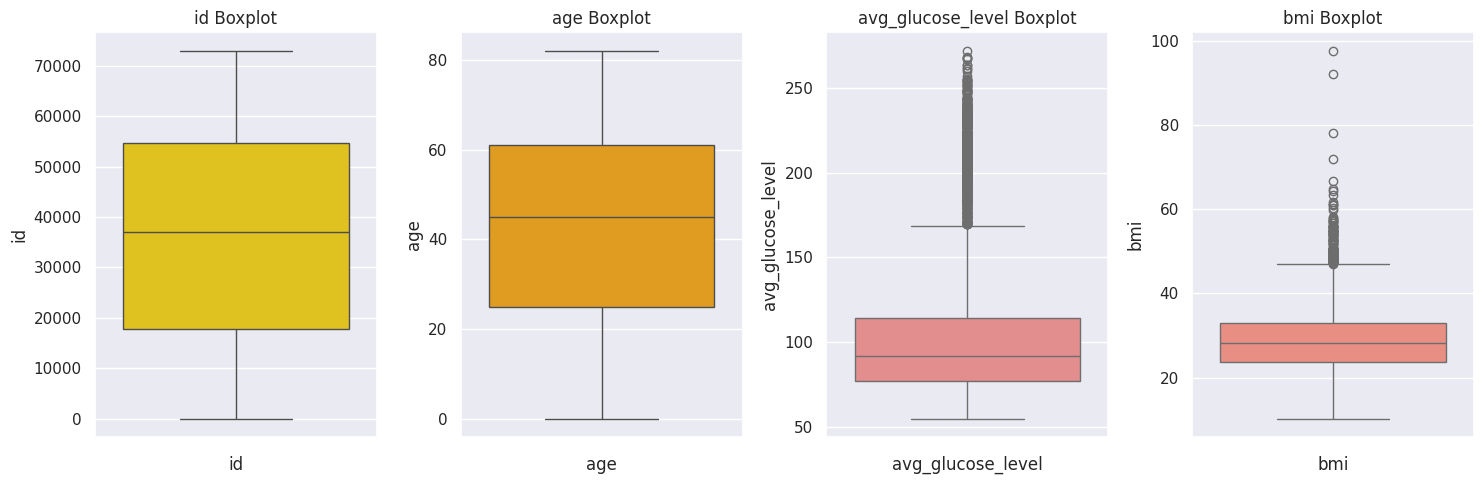

In [ ]:
import random
import matplotlib.pyplot as plt

colors = ["skyblue", "lightgreen", "salmon", "gold", "lightcoral", "mediumslateblue", "orange"]

plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features, start=1):
    random_color = random.choice(colors)
    plt.subplot(1, len(numerical_features), i)
    sns.boxplot(cleaned_df[feature], color=random_color)
    plt.title(f'{feature} Boxplot')
    plt.xlabel(feature)

plt.tight_layout()
plt.show();

### Outlier

In [ ]:
cleaned_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

#### avg_glucose_level

In [ ]:
# avg_glucose_level
Q1 = cleaned_df["avg_glucose_level"].quantile(0.25)
Q3 = cleaned_df["avg_glucose_level"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

condition = (
    (cleaned_df["avg_glucose_level"] < lower_bound) |
    (cleaned_df["avg_glucose_level"] > upper_bound)
)

avg_glucose_level_outlier_df = cleaned_df[condition]

In [ ]:
avg_glucose_level_outlier_df.describe()

,id,age,avg_glucose_level,bmi
count,627.00,627.00,627.00,627.00
mean,36040.73,59.96,211.34,33.28
std,21013.15,16.26,20.83,7.66
min,239.00,1.00,169.43,14.20
25%,16920.00,52.00,196.76,27.90
50%,36377.00,62.00,210.00,32.20
75%,53477.50,72.50,226.71,37.20
max,72915.00,82.00,271.74,71.90


In [ ]:
len(avg_glucose_level_outlier_df) / len(cleaned_df) * 100

12.270058708414872

In [ ]:
# Tính các ngưỡng phân vị
glucose_95th = df['avg_glucose_level'].quantile(0.95)

# Tính tỷ lệ đột quỵ chung
overall_stroke_rate = (df['stroke'].sum() / len(df)) * 100

# Phân tích nhóm có glucose cao
high_glucose_mask = df['avg_glucose_level'] > glucose_95th
high_glucose_df = df[high_glucose_mask]
high_glucose_stroke_rate = (high_glucose_df['stroke'].sum() / len(high_glucose_df)) * 100

# so sánh
print(f"Tỷ lệ đột quỵ chung: {overall_stroke_rate:.2f}%")
print(f"Tỷ lệ đột quỵ nhóm có glucose cao: {high_glucose_stroke_rate:.2f}%")

Tỷ lệ đột quỵ chung: 4.87%
Tỷ lệ đột quỵ nhóm có glucose cao: 14.06%


In [ ]:
glucose_95th

216.29450000000003

- Outliers ở cột này rất quan trọng, không thể bỏ được

In [ ]:
def categorize_glucose_level(value):
    if value < 100:
        return 'Normal'
    elif 100 <= value <= 125:
        return 'Prediabetes'
    elif 126 <= value <= 216:
        return 'High Risk'
    else:
        return 'Very High Risk'

cleaned_df['glucose_category'] = cleaned_df['avg_glucose_level'].apply(categorize_glucose_level)

#### Bmi

In [ ]:
# avg_glucose_level
Q1 = cleaned_df["bmi"].quantile(0.25)
Q3 = cleaned_df["bmi"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

condition = (
    (cleaned_df["bmi"] < lower_bound) |
    (cleaned_df["bmi"] > upper_bound)
)

bmi_outlier_df = cleaned_df[condition]

In [ ]:
bmi_outlier_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,117.00,32247.38,21724.61,99.00,13861.00,32257.00,49277.00,72911.00
age,117.00,45.08,13.66,14.00,37.00,46.00,53.00,82.00
avg_glucose_level,117.00,122.00,58.64,56.63,79.36,98.07,176.78,253.16
bmi,117.00,53.77,7.51,47.10,49.30,52.30,55.70,97.60


In [ ]:
len(bmi_outlier_df) / len(cleaned_df) * 100

2.289628180039139

- Không quá nhiều outliers, để nguyên đại đi

## Categorical

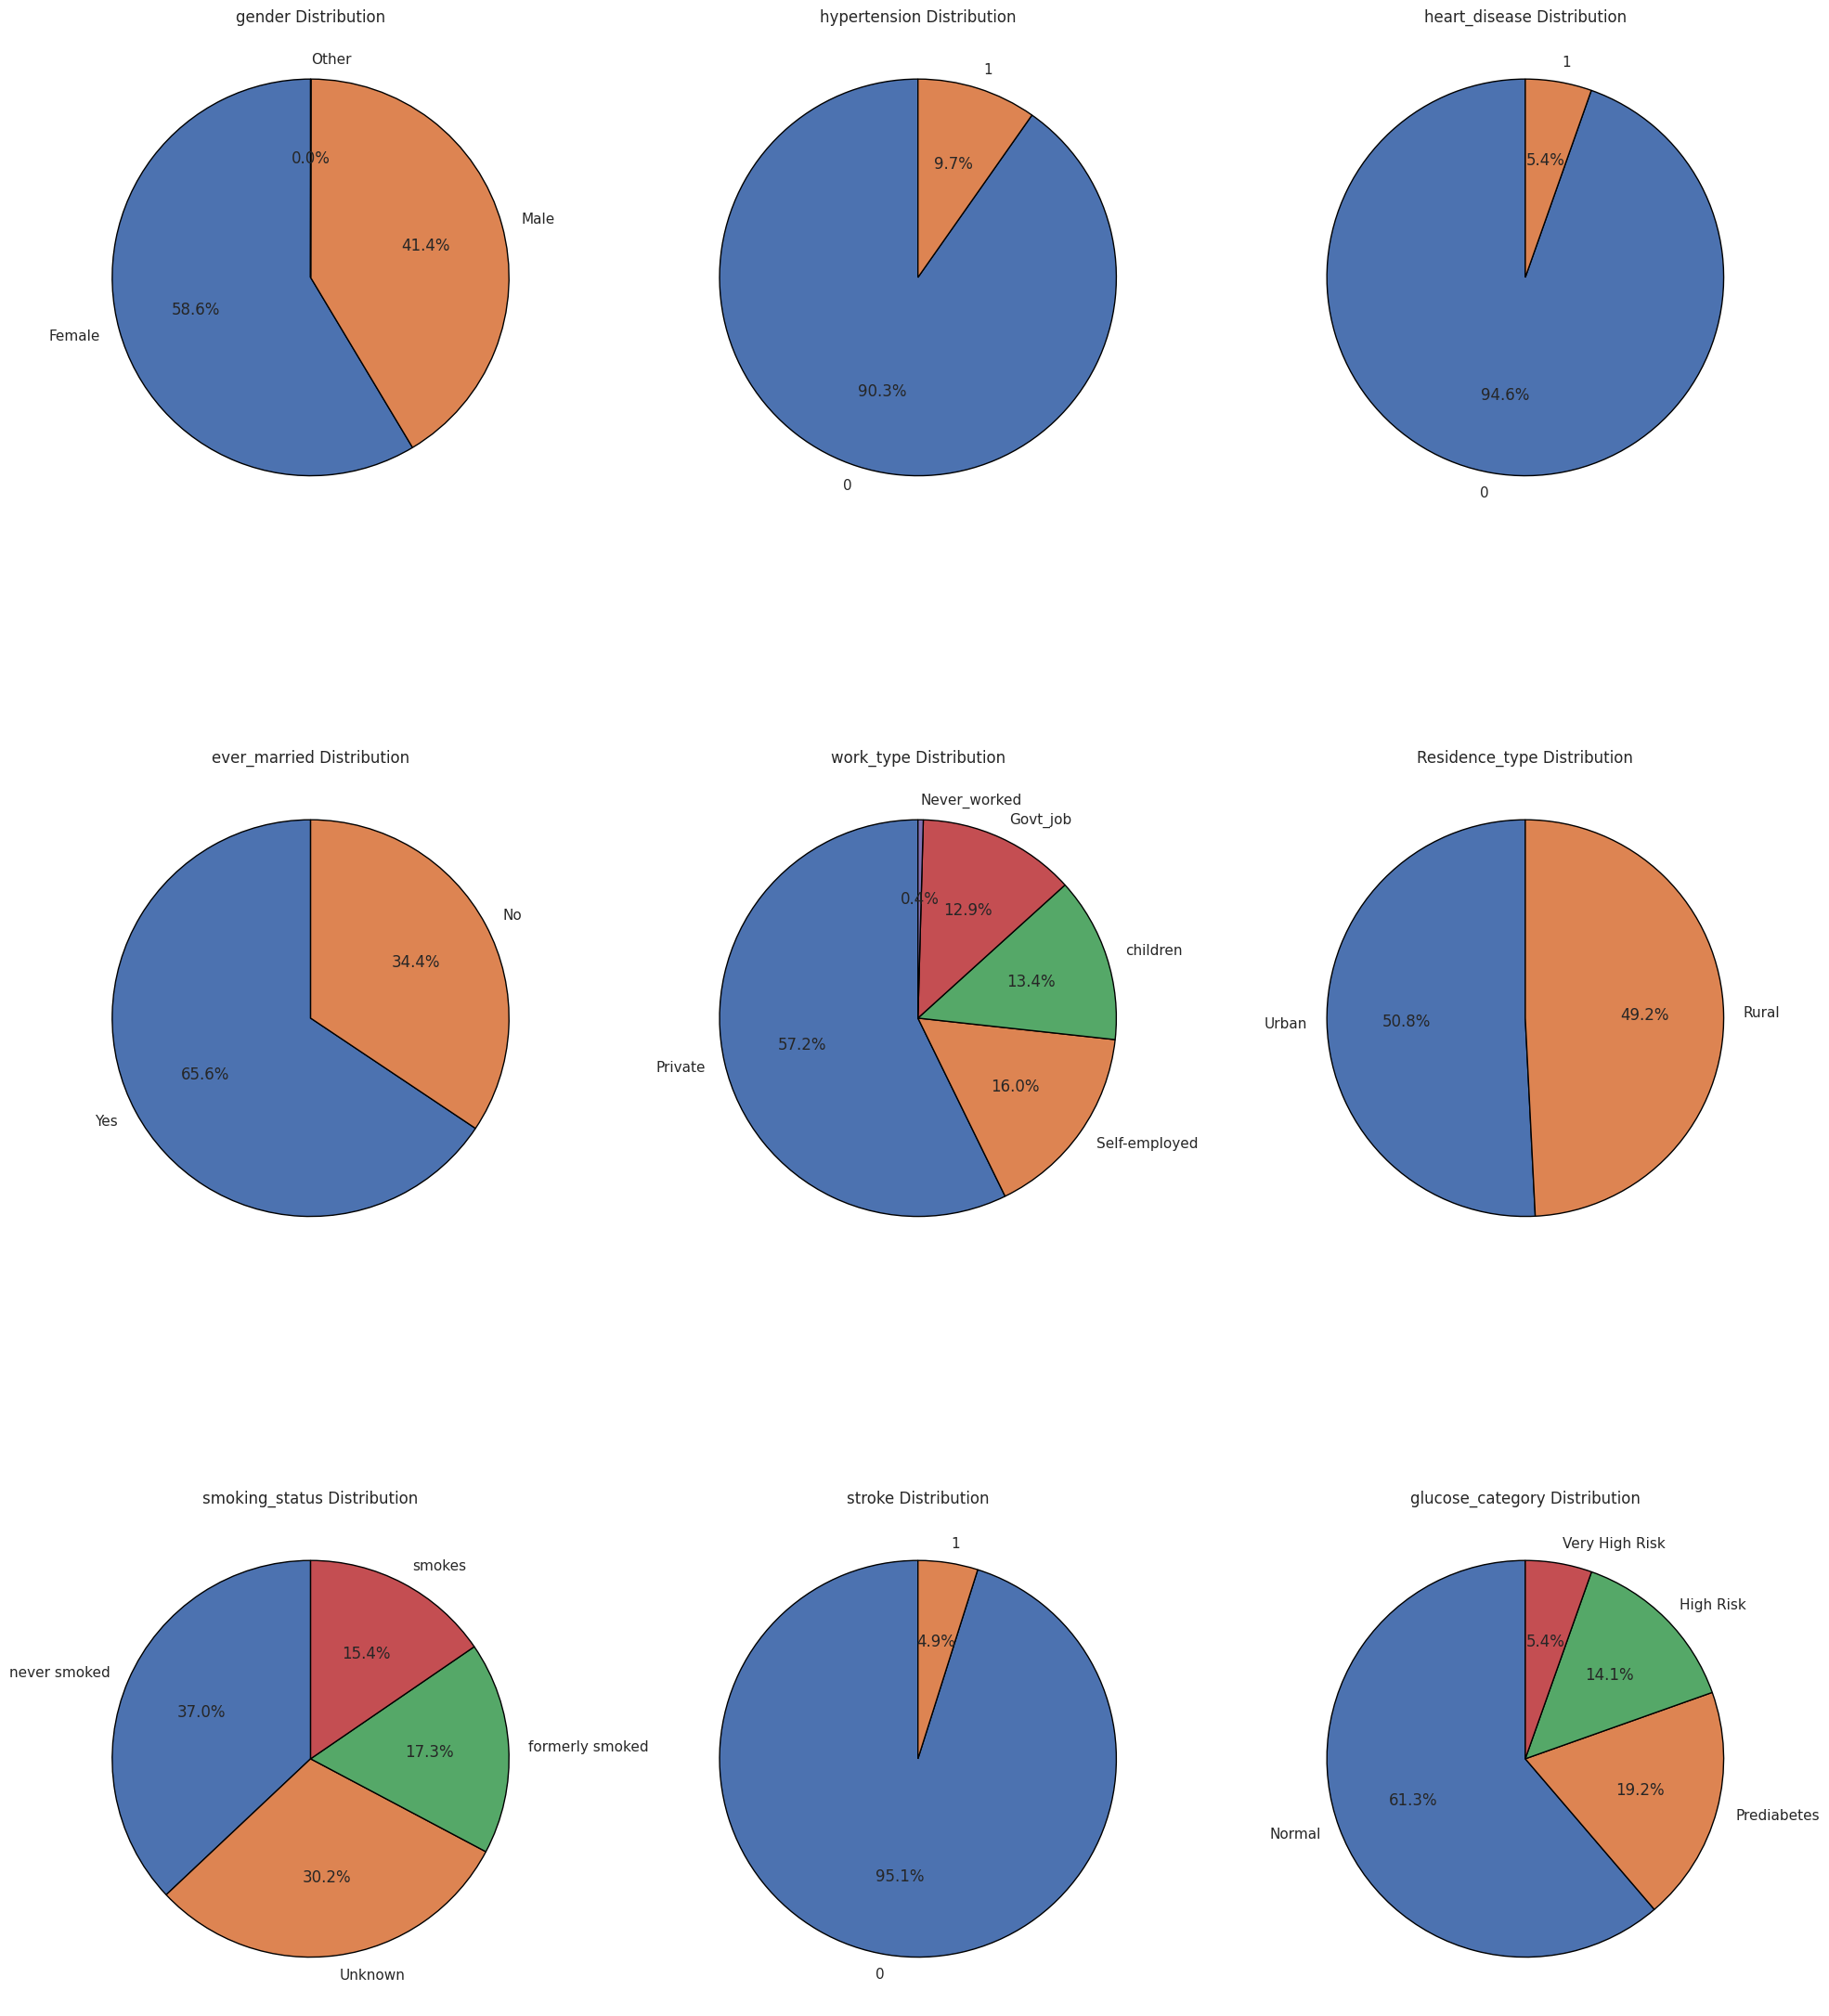

In [ ]:
import matplotlib.pyplot as plt

# Define categorical features
categorical_features = ["gender", "hypertension", "heart_disease", "ever_married",
                        "work_type", "Residence_type", "smoking_status", "stroke"]

categorical_features.append('glucose_category')

# Create a figure

# Set up the size of the plot canvas
plt.figure(figsize=(20, 25))

# Loop through each categorical feature to create pie charts
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)  # 3 rows, 3 columns for subplots
    cleaned_df[feature].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
    plt.title(f'{feature} Distribution')
    plt.ylabel('')  # Hide y-axis label for better visual

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
cleaned_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'glucose_category'],
      dtype='object')

In [ ]:
cleaned_df['gender'].value_counts()

,count
gender,
Female,2994
Male,2115
Other,1


In [ ]:
mask = (cleaned_df['gender'] == 'Other')
cleaned_df = cleaned_df[~mask]

In [ ]:
cleaned_df['work_type'].value_counts()

,count
work_type,
Private,2924
Self-employed,819
children,687
Govt_job,657
Never_worked,22


## Target columns

### Pie chart

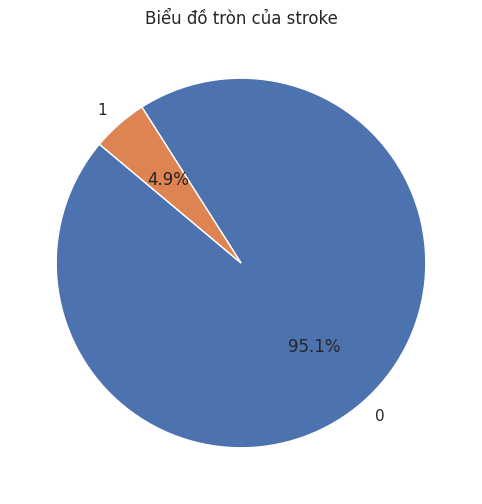

In [ ]:
data = cleaned_df['stroke'].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 6))  # Kích thước của biểu đồ
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
plt.title('Biểu đồ tròn của stroke')
plt.show()

### Barchart

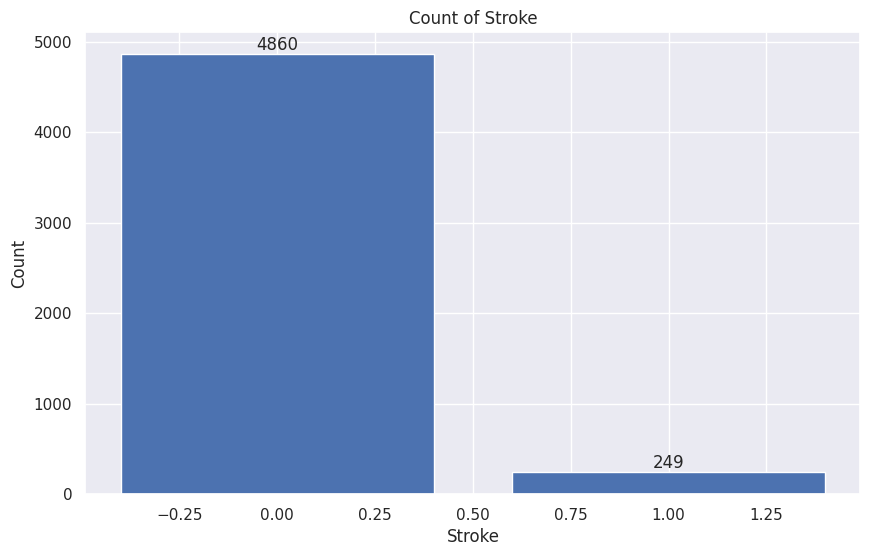

In [ ]:
# astype
cleaned_df['stroke'] = cleaned_df['stroke'].astype('category')
label_count = cleaned_df['stroke'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(label_count.index, label_count.values)
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.title('Count of Stroke')
for i, v in enumerate(label_count.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

---
### Xử lý imbalance

Dùng kĩ thuật Under Sampling để xử lý

In [ ]:
count_troke = cleaned_df['stroke'].value_counts()
label_0 = cleaned_df[cleaned_df['stroke'] == 0].sample(count_troke[1], random_state=42)
label_1 = cleaned_df[cleaned_df['stroke'] == 1]
cleaned_df = pd.concat([label_0, label_1], axis=0)

In [ ]:
len(cleaned_df) / len(df) * 100

9.74559686888454

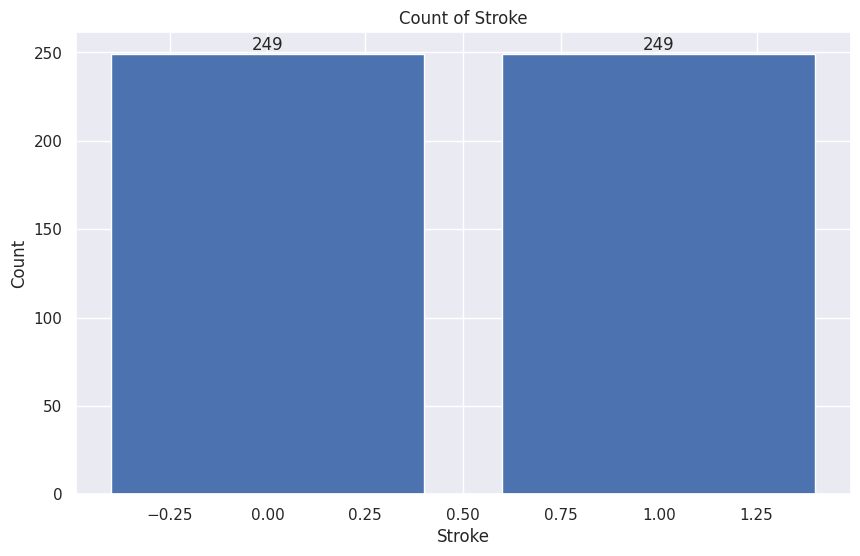

In [ ]:
label_count = cleaned_df['stroke'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(label_count.index, label_count.values)
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.title('Count of Stroke')
for i, v in enumerate(label_count.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

In [ ]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 498 entries, 2435 to 248
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 498 non-null    int64   
 1   gender             498 non-null    category
 2   age                498 non-null    float64 
 3   hypertension       498 non-null    category
 4   heart_disease      498 non-null    category
 5   ever_married       498 non-null    category
 6   work_type          498 non-null    category
 7   Residence_type     498 non-null    category
 8   avg_glucose_level  498 non-null    float64 
 9   bmi                498 non-null    float64 
 10  smoking_status     498 non-null    category
 11  stroke             498 non-null    category
 12  glucose_category   498 non-null    object  
dtypes: category(8), float64(3), int64(1), object(1)
memory usage: 28.4+ KB


## Feature with target

### Numerical

In [ ]:
numerical_features

['id', 'age', 'avg_glucose_level', 'bmi']

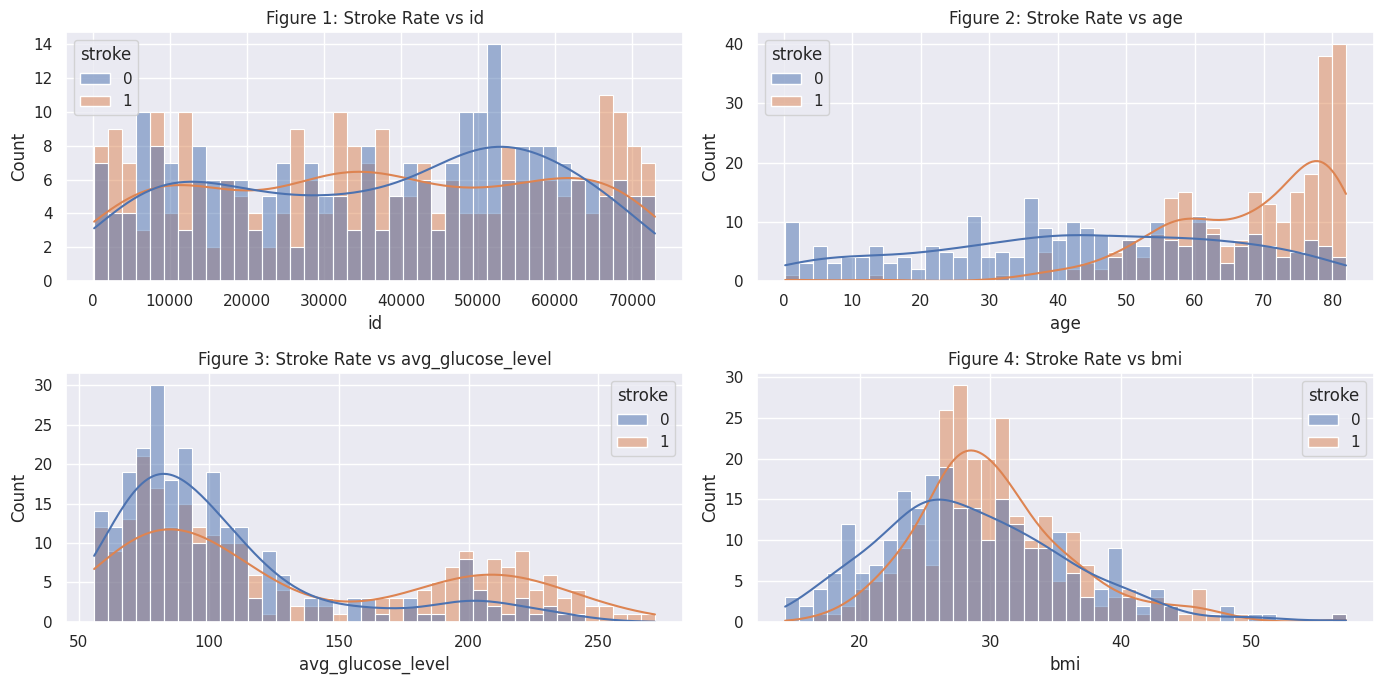

In [ ]:
n_rows = 2
n_cols = 2

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*7, n_rows*3.5))

for r in range(n_rows):
    for c in range(n_cols):
        i = r * n_cols + c # index to loop through list "cols"
        if i < len(numerical_features):
            ax_i = ax[c] if n_rows == 1 else ax[r, c]
            sns.histplot(data=cleaned_df, x=numerical_features[i], bins=40, kde=True, hue="stroke",  ax=ax_i)
            ax_i.set_title(f"Figure {i+1}: Stroke Rate vs {numerical_features[i]}")
            ax_i.set_xlabel(numerical_features[i])
plt.tight_layout()
plt.show();

### Categorical

In [ ]:
categorical_features

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status',
 'stroke',
 'glucose_category']

In [ ]:
len(categorical_features)

9

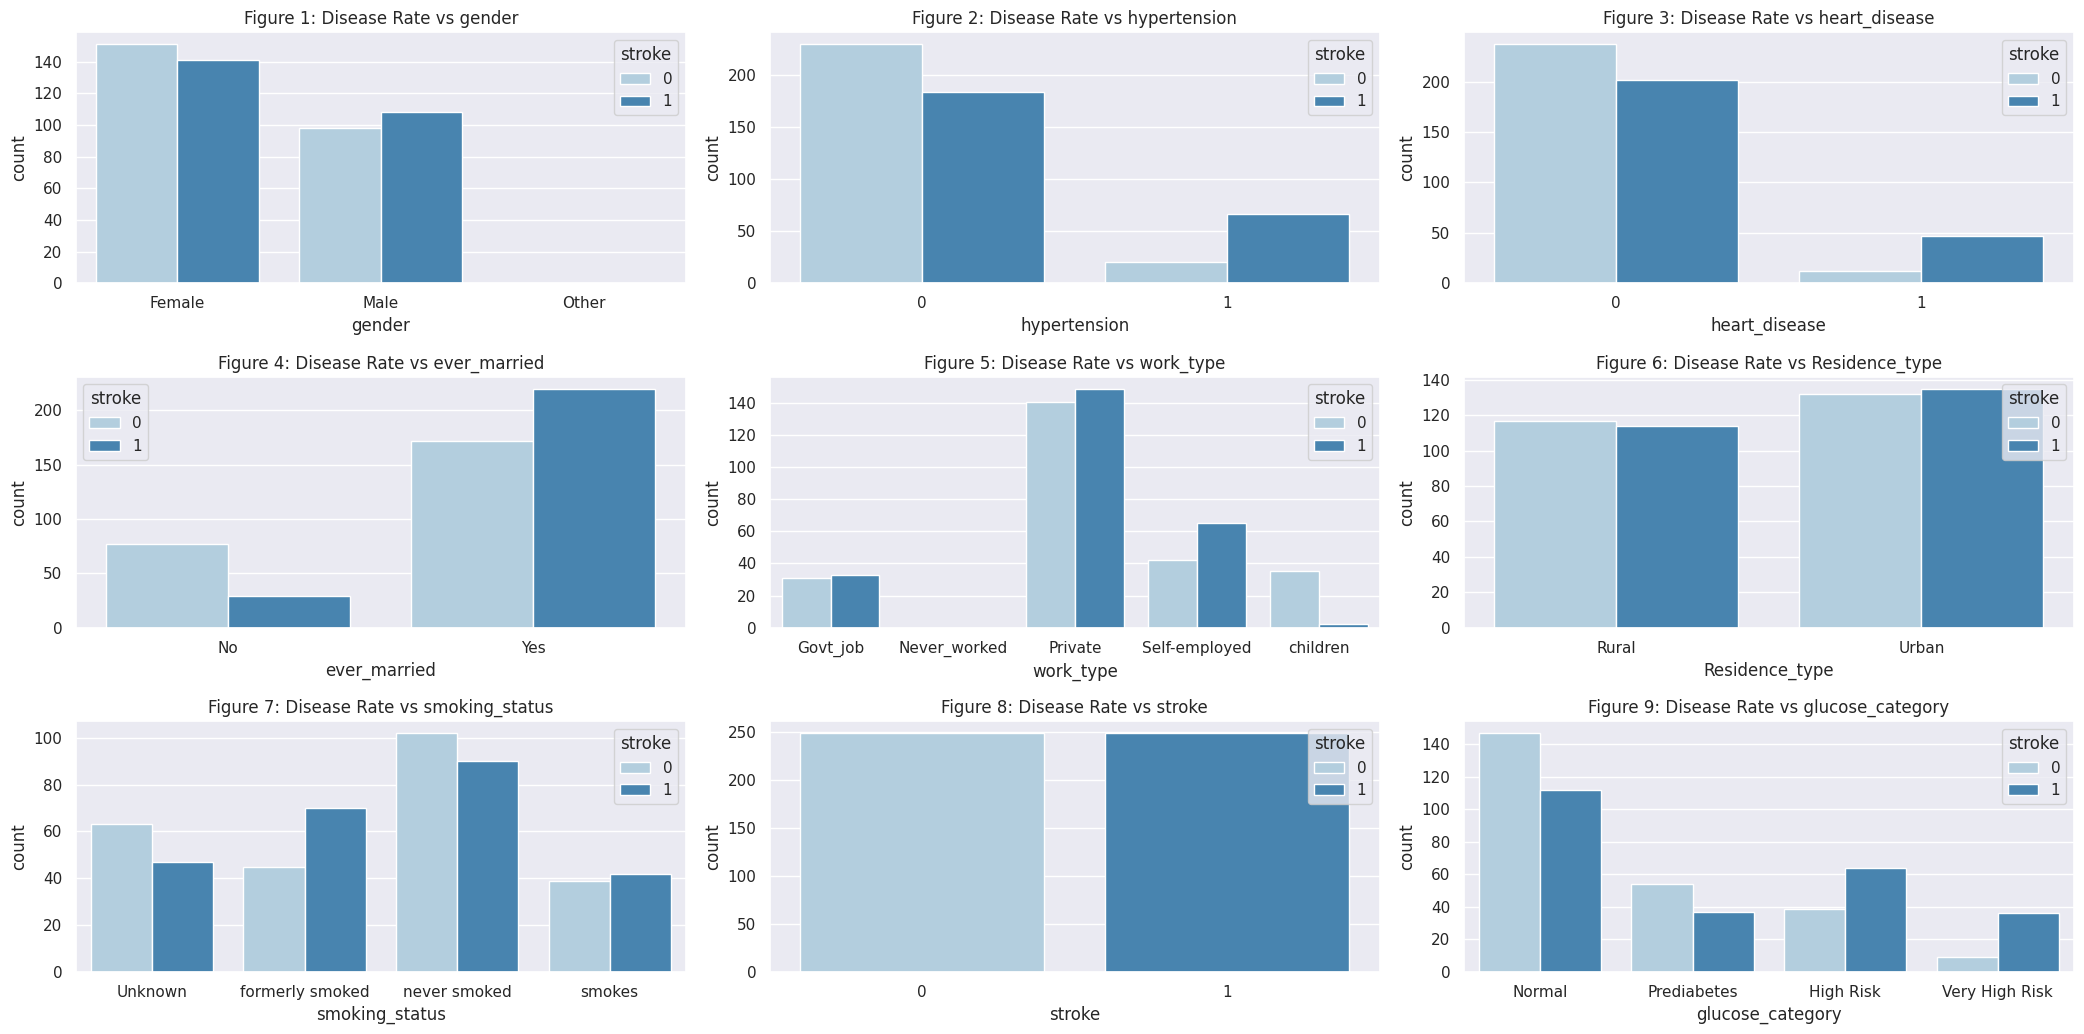

In [ ]:
n_rows = 3
n_cols = 3

fig, ax = plt.subplots(n_rows,n_cols, figsize=(n_rows*7,n_cols*3.5))

for r in range(0,n_rows):
    for c in range(0,n_cols):
        i = r*n_cols + c # index to loop through list "cols"
        if i < len(categorical_features):
            ax_i = ax[c] if n_rows == 1 else ax[r, c]
            sns.countplot(data= cleaned_df, x = categorical_features[i], hue = "stroke", palette = "Blues", ax = ax_i);
            ax_i.set_title(f"Figure {i+1}: Disease Rate vs {categorical_features[i]}")

plt.tight_layout()
plt.show();

### Xóa những feature không quan trọng

In [ ]:
mask = ['id', 'Residence_type']
cleaned_df.drop(mask, axis=1, inplace=True)

In [ ]:
cleaned_df.shape

(498, 11)

# Correlation

### One-hot encoding

In [ ]:
categorical_features

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status',
 'stroke',
 'glucose_category']

In [ ]:
# Xóa 2 value là stroke và residence
categorical_features.remove('stroke')
categorical_features.remove('Residence_type')

In [ ]:
cleaned_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke,glucose_category
2435,Male,44.00,0,0,Yes,Private,80.75,30.90,never smoked,0,Normal
3601,Female,27.00,0,0,No,Private,82.05,21.00,Unknown,0,Normal
2900,Female,56.00,0,0,Yes,Private,94.19,25.70,never smoked,0,Normal
2353,Female,5.00,0,0,No,children,122.25,16.70,Unknown,0,Prediabetes
4061,Male,38.00,0,0,Yes,Govt_job,122.83,30.60,Unknown,0,Prediabetes


In [ ]:
cleaned_df = pd.get_dummies(cleaned_df, columns = categorical_features)
cleaned_df.head()

,age,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,glucose_category_High Risk,glucose_category_Normal,glucose_category_Prediabetes,glucose_category_Very High Risk
2435,44.00,80.75,30.90,0,False,True,False,True,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False
3601,27.00,82.05,21.00,0,True,False,False,True,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False
2900,56.00,94.19,25.70,0,True,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False
2353,5.00,122.25,16.70,0,True,False,False,True,False,True,False,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False
4061,38.00,122.83,30.60,0,False,True,False,True,False,True,False,False,True,True,False,False,False,False,True,False,False,False,False,False,True,False


In [ ]:
# Xóa cột gender_Other
cleaned_df.drop('gender_Other', axis=1, inplace=True)

In [ ]:
cleaned_df.shape

(498, 25)

In [ ]:
df_corr = cleaned_df.corr()
df_corr

,age,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,glucose_category_High Risk,glucose_category_Normal,glucose_category_Prediabetes,glucose_category_Very High Risk
age,1.00,0.28,0.26,0.57,-0.00,0.00,-0.27,0.27,-0.27,0.27,-0.55,0.55,0.04,NaN,0.08,0.27,-0.63,-0.30,0.22,0.06,0.01,0.16,-0.14,-0.13,0.18
avg_glucose_level,0.28,1.00,0.30,0.25,-0.15,0.15,-0.18,0.18,-0.30,0.30,-0.20,0.20,0.02,NaN,0.09,-0.06,-0.10,-0.10,0.07,-0.03,0.07,0.57,-0.76,-0.08,0.64
bmi,0.26,0.30,1.00,0.12,0.07,-0.07,-0.13,0.13,-0.08,0.08,-0.35,0.35,0.04,NaN,0.16,0.03,-0.39,-0.24,0.08,0.09,0.06,0.13,-0.17,-0.08,0.22
stroke,0.57,0.25,0.12,1.00,-0.04,0.04,-0.24,0.24,-0.22,0.22,-0.24,0.24,0.01,NaN,0.03,0.11,-0.25,-0.08,0.12,-0.05,0.02,0.12,-0.14,-0.09,0.19
gender_Female,-0.00,-0.15,0.07,-0.04,1.00,-1.00,-0.01,0.01,0.11,-0.11,0.02,-0.02,0.09,NaN,-0.03,0.01,-0.07,-0.09,-0.07,0.22,-0.10,-0.08,0.10,0.04,-0.11
gender_Male,0.00,0.15,-0.07,0.04,-1.00,1.00,0.01,-0.01,-0.11,0.11,-0.02,0.02,-0.09,NaN,0.03,-0.01,0.07,0.09,0.07,-0.22,0.10,0.08,-0.10,-0.04,0.11
hypertension_0,-0.27,-0.18,-0.13,-0.24,-0.01,0.01,1.00,-1.00,0.06,-0.06,0.09,-0.09,0.02,NaN,0.05,-0.16,0.13,0.19,-0.01,-0.11,-0.06,-0.09,0.07,0.11,-0.13
hypertension_1,0.27,0.18,0.13,0.24,0.01,-0.01,-1.00,1.00,-0.06,0.06,-0.09,0.09,-0.02,NaN,-0.05,0.16,-0.13,-0.19,0.01,0.11,0.06,0.09,-0.07,-0.11,0.13
heart_disease_0,-0.27,-0.30,-0.08,-0.22,0.11,-0.11,0.06,-0.06,1.00,-1.00,0.07,-0.07,0.01,NaN,-0.07,0.01,0.10,0.08,-0.06,0.11,-0.16,-0.12,0.21,0.03,-0.23
heart_disease_1,0.27,0.30,0.08,0.22,-0.11,0.11,-0.06,0.06,-1.00,1.00,-0.07,0.07,-0.01,NaN,0.07,-0.01,-0.10,-0.08,0.06,-0.11,0.16,0.12,-0.21,-0.03,0.23


In [ ]:
# ones_like can build a matrix of boolean (True, False) with the same shape as our data
ones_corr  = np.ones_like(df_corr,dtype=bool)

In [ ]:
ones_corr.shape, df_corr.shape

((25, 25), (25, 25))

In [ ]:
# np. triu: return only upper triangle matrix
mask = np.triu(ones_corr)
adjusted_mask = mask[1:,:-1]
adjusted_df_corr = df_corr.iloc[1:,:-1]

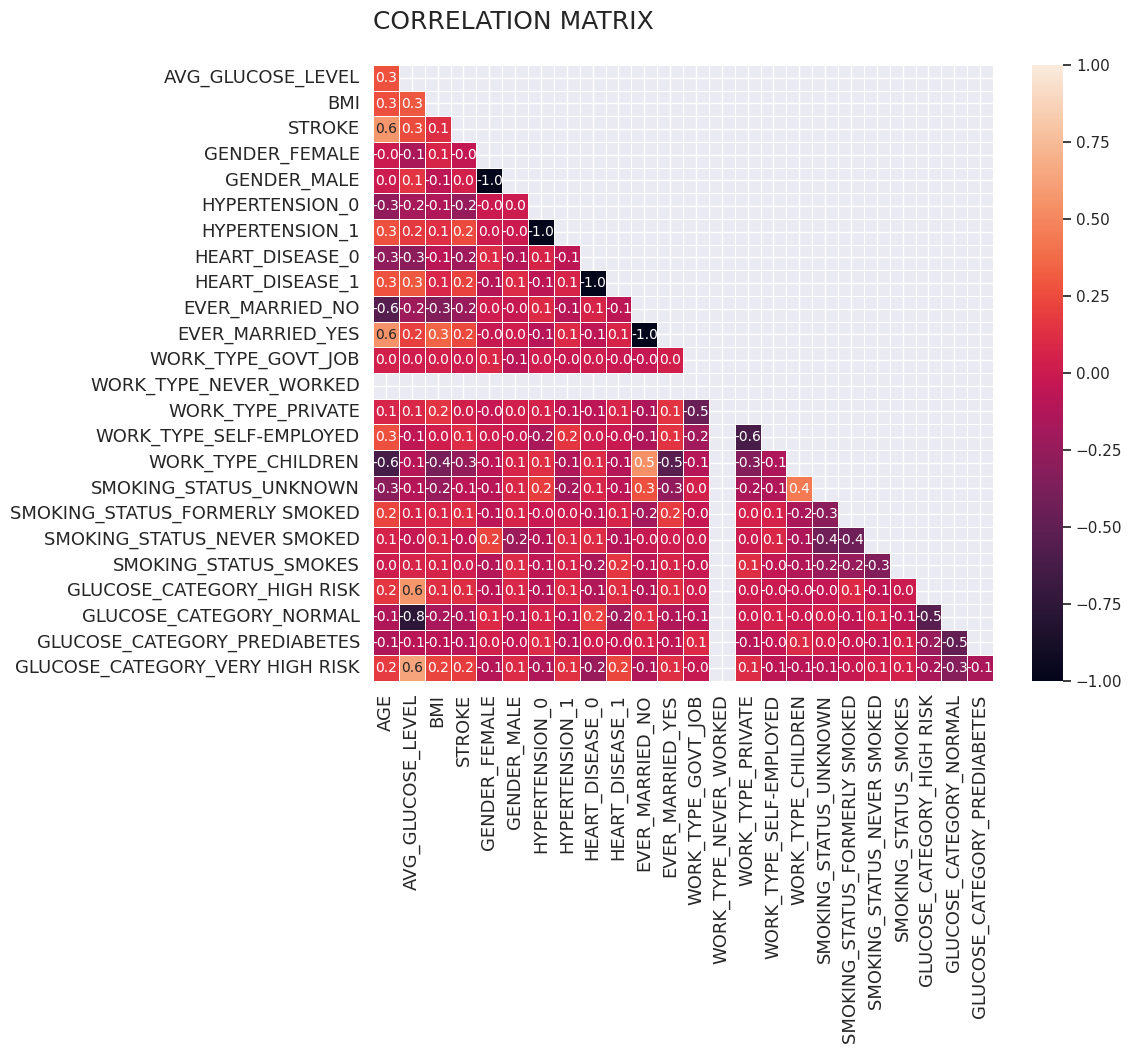

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

sns.heatmap(data= adjusted_df_corr, mask=adjusted_mask,
            annot=True, annot_kws={"fontsize":10}, fmt=".1f",
            vmin=-1, vmax=1,
            linecolor='white', linewidths=0.5);

yticks = [i.upper() for i in adjusted_df_corr.index]
xticks = [i.upper() for i in adjusted_df_corr.columns]

ax.set_yticklabels(yticks, rotation=0, fontsize=13);
ax.set_xticklabels(xticks, rotation=90, fontsize=13);
title = 'CORRELATION MATRIX\n'
ax.set_title(title, loc='left', fontsize=18);

# Train model

## Train test split

In [ ]:
# xóa cột stroke
X = cleaned_df.drop('stroke', axis=1)
y = cleaned_df['stroke']

In [ ]:
X.shape, y.shape

((498, 24), (498,))

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

# Khởi tạo StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=40)

# Chia dữ liệu thành tập train và test
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

print("Kích thước tập train:", X_train.shape)
print("Kích thước tập test:", X_test.shape)

Kích thước tập train: (333, 24)
Kích thước tập test: (165, 24)


<ipython-input-65-ff0db656c7f8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="Blues", ax=ax1)
<ipython-input-65-ff0db656c7f8>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, palette="Blues", ax=ax2)


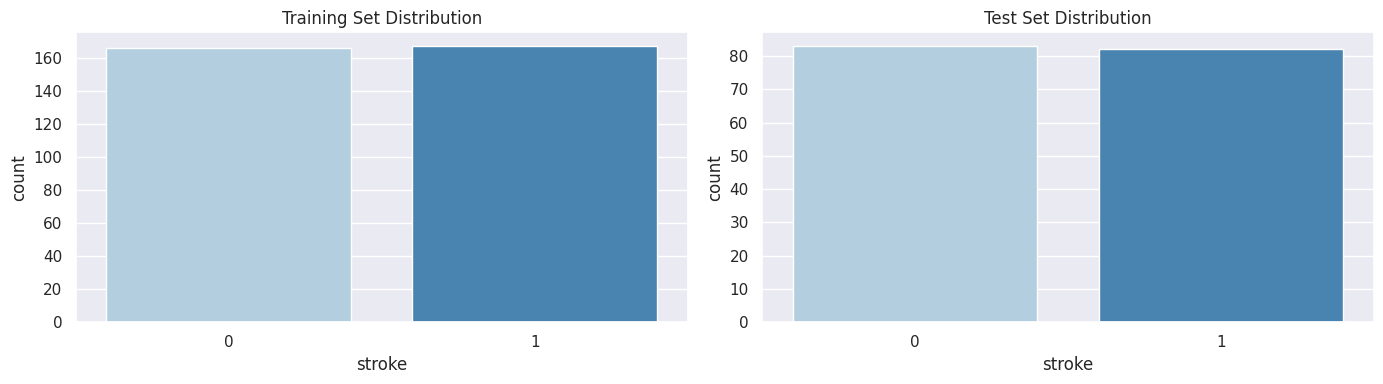

In [ ]:
# Tối ưu: Gộp việc tạo subplot thành 1 dòng và giảm kích thước code
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

# Vẽ distribution cho train set
sns.countplot(x=y_train, palette="Blues", ax=ax1)
ax1.set_title("Training Set Distribution")

# Vẽ distribution cho test set
sns.countplot(x=y_test, palette="Blues", ax=ax2)
ax2.set_title("Test Set Distribution")

plt.tight_layout()
plt.show()

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train)

In [ ]:
X_train_processed.shape

(333, 24)

In [ ]:
X_test_processed = scaler.transform(X_test)

In [ ]:
X_test_processed.shape

(165, 24)

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
knn.fit(X_train, y_train)

# Make predictions
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Calculate accuracy for training and test sets
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for KNeighborsClassifier = {accuracy_for_train}')
print(f'Accuracy for test set for KNeighborsClassifier = {accuracy_for_test}')

Accuracy for training set for KNeighborsClassifier = 0.76
Accuracy for test set for KNeighborsClassifier = 0.76


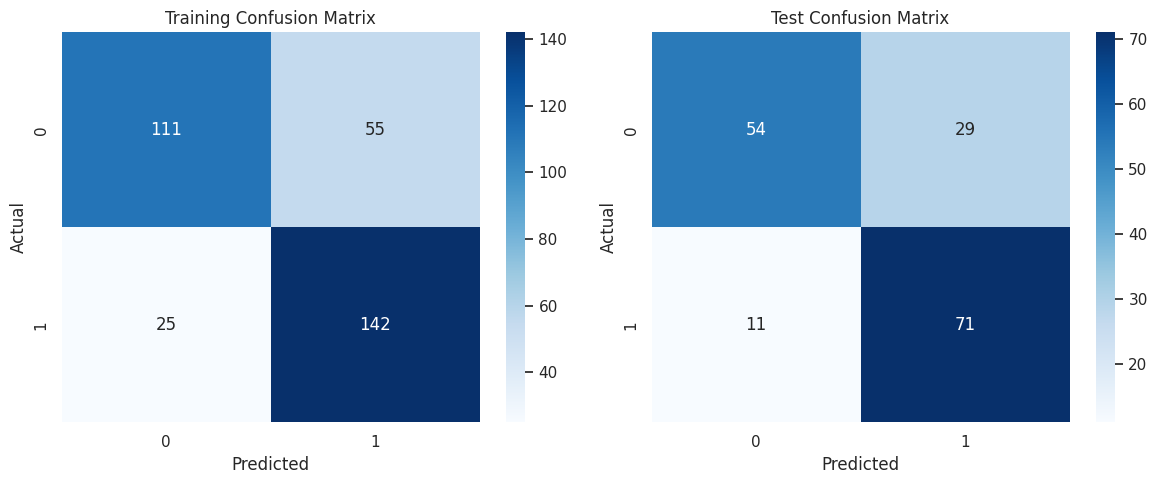

In [ ]:
# Visualize results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot confusion matrix cho training set
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Training Confusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

# Plot confusion matrix cho test set
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_title('Test Confusion Matrix')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [ ]:
# Print classification report
print("\nTraining Set Classification Report:")
print(classification_report(y_train, y_train_pred))
print("\nTest Set Classification Report:")
print(classification_report(y_test, y_test_pred))


Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.67      0.74       166
           1       0.72      0.85      0.78       167

    accuracy                           0.76       333
   macro avg       0.77      0.76      0.76       333
weighted avg       0.77      0.76      0.76       333


Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.65      0.73        83
           1       0.71      0.87      0.78        82

    accuracy                           0.76       165
   macro avg       0.77      0.76      0.75       165
weighted avg       0.77      0.76      0.75       165




markdown
Sao chép mã
# Phân tích kết quả KNN

## TRAINING SET:

### Class 1 (Bị bệnh):
- **Recall** = 0.85 (phát hiện được 85% ca bệnh)
- **Precision** = 0.72 (72% dự đoán bị bệnh là đúng)
- **Support** = 167 mẫu

### Class 0 (Không bệnh):
- **Recall** = 0.67 (phát hiện 67% người không bệnh)
- **Precision** = 0.82 (82% dự đoán không bệnh là đúng)
- **Support** = 166 mẫu

## TEST SET:

### Class 1 (Bị bệnh):
- **Recall** = 0.87 (phát hiện được 87% ca bệnh) ⭐
- **Precision** = 0.71 (71% dự đoán bị bệnh là đúng)
- **Support** = 82 mẫu

### Class 0 (Không bệnh):
- **Recall** = 0.65 (phát hiện 65% người không bệnh)
- **Precision** = 0.83 (83% dự đoán không bệnh là đúng)
- **Support** = 83 mẫu

## ĐÁNH GIÁ:

### Ưu điểm:
- **Recall class 1 rất tốt** (0.87 trên test set): Phát hiện được 87% ca bệnh.
- **Model khá ổn định** (accuracy train ≈ accuracy test = 0.76).
- **Không có dấu hiệu overfitting**.
- **Data cân bằng giữa 2 class**.

### Hạn chế:
- **False Positive cao** (Precision class 1 = 0.71): 29% chẩn đoán bị bệnh là sai.
- **Recall class 0 thấp** (0.65): Nhiều người không bệnh bị chẩn đoán nhầm là bệnh.

## KẾT LUẬN:

### Model KNN này PHÙ HỢP cho ứng dụng y tế vì:
- **Recall class 1 cao** (0.87): Ít bỏ sót ca bệnh.
- **Ổn định giữa train và test set**.
- **Chấp nhận được trade-off về false positive**.

### Trong thực tế có thể sử dụng vì:
- **Bệnh nhân được chẩn đoán là bệnh sẽ được xét nghiệm thêm**.
- **Chi phí xét nghiệm thêm < chi phí bỏ sót ca bệnh**.
- **Recall cao đảm bảo an toàn cho bệnh nhân**.

## SVM to predict

In [ ]:
from sklearn.svm import SVC

# Train SVM model
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)

# Make predictions
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

# Calculate accuracy for training and test sets
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for SVM = {accuracy_for_train}')
print(f'Accuracy for test set for SVM = {accuracy_for_test}')

Accuracy for training set for SVM = 0.76
Accuracy for test set for SVM = 0.74


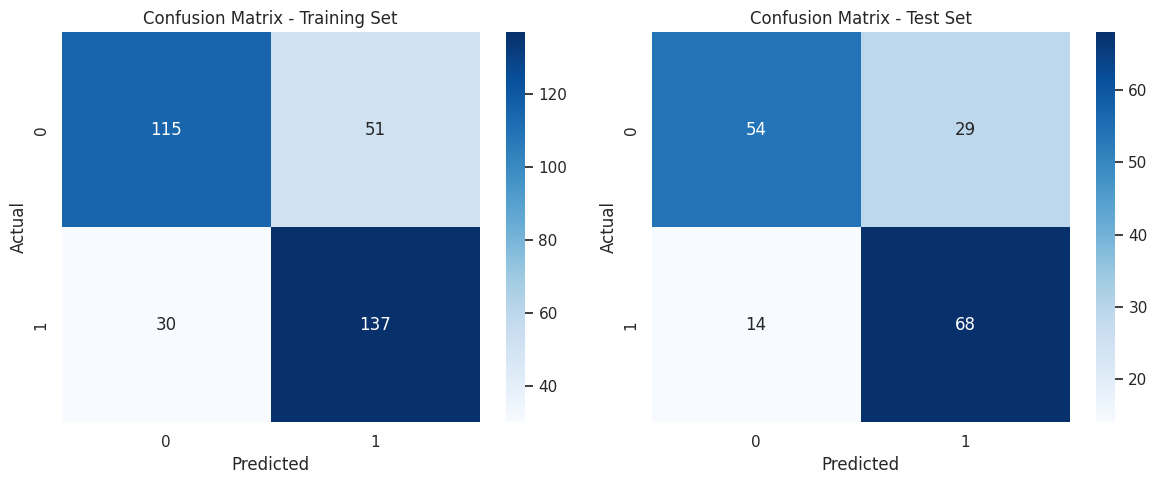

In [ ]:
# Plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix - Training Set')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix - Test Set')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show();

In [ ]:
# Print classification report
print("\nTraining Set Classification Report:")
print(classification_report(y_train, y_train_pred))
print("\nTest Set Classification Report:")
print(classification_report(y_test, y_test_pred))


Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.69      0.74       166
           1       0.73      0.82      0.77       167

    accuracy                           0.76       333
   macro avg       0.76      0.76      0.76       333
weighted avg       0.76      0.76      0.76       333


Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.65      0.72        83
           1       0.70      0.83      0.76        82

    accuracy                           0.74       165
   macro avg       0.75      0.74      0.74       165
weighted avg       0.75      0.74      0.74       165



# Phân tích SVM Classification Report

## Training Set

### Class 1 (Bị bệnh)
- **Recall**: 0.82 (phát hiện 82% ca bệnh)
- **Precision**: 0.73 (73% dự đoán bị bệnh là đúng)
- **F1-score**: 0.77
- **Support**: 167 mẫu

### Class 0 (Không bệnh)
- **Recall**: 0.69 (phát hiện 69% người không bệnh)
- **Precision**: 0.79 (79% dự đoán không bệnh là đúng)
- **Support**: 166 mẫu

## Test Set

### Class 1 (Bị bệnh)
- **Recall**: 0.83 ⭐ (phát hiện 83% ca bệnh)
- **Precision**: 0.70 (70% dự đoán bị bệnh là đúng)
- **Support**: 82 mẫu

### Class 0 (Không bệnh)
- **Recall**: 0.65 (phát hiện 65% người không bệnh)
- **Precision**: 0.79 (79% dự đoán không bệnh là đúng)
- **Support**: 83 mẫu

## So sánh với KNN

### Điểm mạnh của SVM ✅
- **Precision ổn định hơn** giữa train và test.
- **F1-score trung bình cao hơn một chút**.
- **Ít có hiện tượng overfitting hơn** so với KNN.

### Điểm yếu của SVM ⚠️
- **Recall class 1 thấp hơn** (0.83 so với 0.87 của KNN).
- **Recall class 0 tương đương KNN** (0.65).

## Kết luận

### Đánh giá hiệu năng
- **Model SVM có độ ổn định tốt**:
  - **Accuracy** train ≈ test (0.76 vs 0.74).
  - **Precision ổn định** giữa train và test.

### Trong ứng dụng y tế
- **KNN có vẻ phù hợp hơn** vì **Recall cao hơn với class 1** (bị bệnh).
- Tuy nhiên, **SVM cho kết quả cân bằng hơn giữa các metrics**.

## Đề xuất

- **Nên ưu tiên dùng KNN** vì:
  - **Recall cao hơn với class 1** (quan trọng trong y tế).
  - **Implementation đơn giản hơn**.

- **Có thể cải thiện SVM bằng**:
  - **Điều chỉnh kernel và các hyperparameter**.
  - **Feature scaling**.
  - **Class weight balancing**.


## Native Bayes to predict

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Train Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Make predictions
y_train_pred = nb.predict(X_train)
y_test_pred = nb.predict(X_test)

# Calculate accuracy for training and test sets
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for NaiveBayesClassifier = {accuracy_for_train}')
print(f'Accuracy for test set for NaiveBayesClassifier = {accuracy_for_test}')

Accuracy for training set for NaiveBayesClassifier = 0.68
Accuracy for test set for NaiveBayesClassifier = 0.7


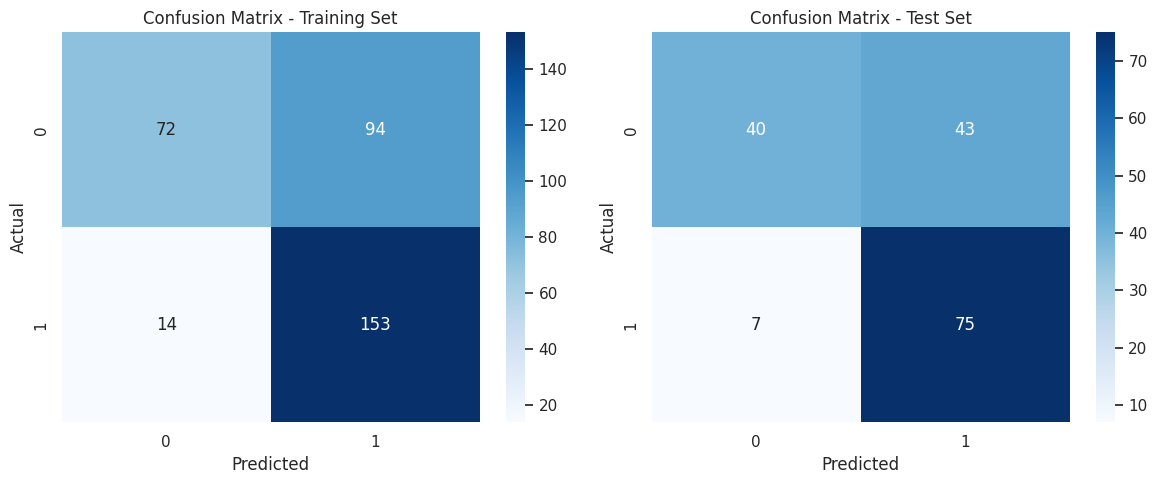

In [ ]:
# Plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix - Training Set')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix - Test Set')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show();

In [ ]:
# Print classification report
print("\nTraining Set Classification Report:")
print(classification_report(y_train, y_train_pred))
print("\nTest Set Classification Report:")
print(classification_report(y_test, y_test_pred))


Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.43      0.57       166
           1       0.62      0.92      0.74       167

    accuracy                           0.68       333
   macro avg       0.73      0.67      0.66       333
weighted avg       0.73      0.68      0.66       333


Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.48      0.62        83
           1       0.64      0.91      0.75        82

    accuracy                           0.70       165
   macro avg       0.74      0.70      0.68       165
weighted avg       0.74      0.70      0.68       165



# Phân tích Naive Bayes Classification Report

## Training Set

### Class 1 (Bị bệnh)
- **Recall**: 0.92 ⭐ (phát hiện 92% ca bệnh)
- **Precision**: 0.62 (62% dự đoán bị bệnh là đúng)
- **F1-score**: 0.74
- **Support**: 167 mẫu

### Class 0 (Không bệnh)
- **Recall**: 0.43 ⚠️ (chỉ phát hiện 43% người không bệnh)
- **Precision**: 0.84 (84% dự đoán không bệnh là đúng)
- **Support**: 166 mẫu

## Test Set

### Class 1 (Bị bệnh)
- **Recall**: 0.91 ⭐ (phát hiện 91% ca bệnh)
- **Precision**: 0.64 (64% dự đoán bị bệnh là đúng)
- **F1-score**: 0.75
- **Support**: 82 mẫu

### Class 0 (Không bệnh)
- **Recall**: 0.48 ⚠️ (chỉ phát hiện 48% người không bệnh)
- **Precision**: 0.85 (85% dự đoán không bệnh là đúng)
- **Support**: 83 mẫu

## So sánh với KNN và SVM

### Điểm mạnh của Naive Bayes ✅
- **Recall class 1 cao nhất** (0.91 so với 0.87 của KNN và 0.83 của SVM).
- **Precision class 0 cao nhất** (0.85).
- **Ổn định giữa train và test set**.

### Điểm yếu của Naive Bayes ⚠️
- **Recall class 0 rất thấp** (0.48).
- **Accuracy tổng thể thấp hơn** (0.70 so với 0.76 của KNN).
- **Precision class 1 thấp nhất** (0.64).

## Kết luận

### Đặc điểm model

- **Thiên về phát hiện ca bệnh (class 1)**:
  - **Recall rất cao** (0.91).
  - Nhưng **nhiều false positive**.

- **Độ chính xác không đồng đều**:
  - **Tốt với việc xác định ca bệnh thực sự**.
  - **Kém với việc xác định người không bệnh**.

### Ứng dụng trong y tế

#### Ưu điểm:
- **Phát hiện được hầu hết ca bệnh** (91%).
- **Phù hợp khi ưu tiên không bỏ sót bệnh nhân**.

#### Nhược điểm:
- **Nhiều người khỏe bị chẩn đoán nhầm là bệnh**.
- **Tốn kém chi phí xét nghiệm thêm**.
- **Gây lo lắng không cần thiết cho bệnh nhân**.

### Khuyến nghị

#### Trong 3 model đã thử:
- **KNN vẫn là lựa chọn cân bằng nhất**.
- **Naive Bayes có thể dùng như screening test đầu tiên**.
- **SVM cho kết quả trung bình**.

#### Có thể cải thiện Naive Bayes:
- **Điều chỉnh prior probabilities**.
- **Feature selection kỹ hơn**.
- **Kết hợp với model khác trong ensemble**.


## Random Forest to predict

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rfc = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=2, n_estimators=10, random_state=42)
rfc.fit(X_train, y_train)

# Make predictions
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

# Calculate accuracy for training and test sets
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for RandomForestClassifier = {accuracy_for_train}')
print(f'Accuracy for test set for RandomForestClassifier = {accuracy_for_test}')

Accuracy for training set for RandomForestClassifier = 0.96
Accuracy for test set for RandomForestClassifier = 0.75


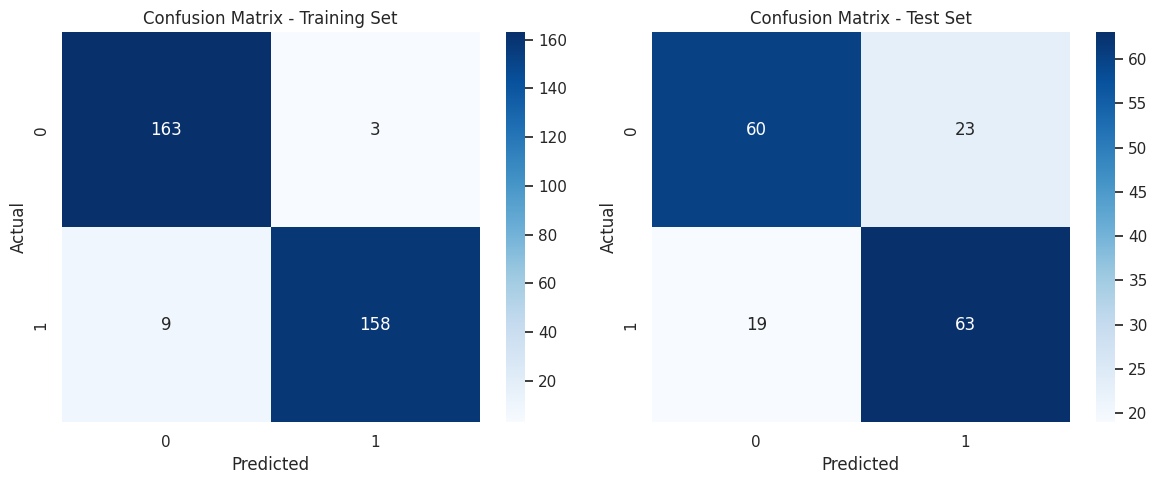

In [ ]:
# Plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix - Training Set')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix - Test Set')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show();

In [ ]:
# Print classification report
print("\nTraining Set Classification Report:")
print(classification_report(y_train, y_train_pred))
print("\nTest Set Classification Report:")
print(classification_report(y_test, y_test_pred))


Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       166
           1       0.98      0.95      0.96       167

    accuracy                           0.96       333
   macro avg       0.96      0.96      0.96       333
weighted avg       0.96      0.96      0.96       333


Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.72      0.74        83
           1       0.73      0.77      0.75        82

    accuracy                           0.75       165
   macro avg       0.75      0.75      0.75       165
weighted avg       0.75      0.75      0.75       165



# Phân tích Random Forest Classification Report

## Training Set

### Class 1 (Bị bệnh)
- **Recall**: 0.95 (phát hiện 95% ca bệnh)
- **Precision**: 0.98 (98% dự đoán bị bệnh là đúng)
- **F1-score**: 0.96
- **Support**: 167 mẫu

### Class 0 (Không bệnh)
- **Recall**: 0.98 (phát hiện 98% người không bệnh)
- **Precision**: 0.95 (95% dự đoán không bệnh là đúng)
- **Support**: 166 mẫu

## Test Set

### Class 1 (Bị bệnh)
- **Recall**: 0.77 (phát hiện 77% ca bệnh)
- **Precision**: 0.73 (73% dự đoán bị bệnh là đúng)
- **F1-score**: 0.75
- **Support**: 82 mẫu

### Class 0 (Không bệnh)
- **Recall**: 0.72 (phát hiện 72% người không bệnh)
- **Precision**: 0.76 (76% dự đoán không bệnh là đúng)
- **Support**: 83 mẫu

## Đánh giá chi tiết

### Vấn đề Overfitting ⚠️

- **Training Set**:
  - **Accuracy** cực cao: 0.96 (96%).
  - **Các metrics đều trên 0.95**, cho thấy model hoạt động rất tốt trên tập huấn luyện.

- **Test Set**:
  - **Accuracy** chỉ đạt 0.75 (75%), sụt giảm khoảng **20% so với training**.
  - Sự chênh lệch giữa train và test set này là **dấu hiệu overfitting nghiêm trọng**. Model có thể đã học quá kỹ các mẫu trong tập huấn luyện, làm giảm khả năng tổng quát hóa đối với dữ liệu mới.

## Kết luận và Khuyến nghị

- **Random Forest có khả năng phân loại tốt trên tập huấn luyện nhưng overfitting** trên tập kiểm tra.
- **Ưu điểm**: Precision và Recall cao khi nhận diện bệnh trong tập huấn luyện, phù hợp cho ứng dụng yêu cầu độ chính xác cao khi nhận diện ca bệnh.
- **Nhược điểm**: Độ chính xác trên tập kiểm tra thấp hơn mong đợi, gây rủi ro khi áp dụng vào thực tế với dữ liệu chưa thấy.

### Đề xuất cải thiện
1. **Giảm overfitting** bằng cách:
   - **Giảm độ phức tạp của model**: Giảm số lượng cây (trees) hoặc độ sâu tối đa (max depth) trong rừng.
   - **Sử dụng kỹ thuật regularization**: Áp dụng phương pháp như pruning.
   - **Tăng dữ liệu**: Cung cấp thêm dữ liệu hoặc áp dụng kỹ thuật data augmentation.
2. **Cross-validation** để đánh giá mức độ ổn định của model trước khi triển khai thực tế.
3. **Kết hợp với các phương pháp khác** (như ensembling hoặc stacking) để tăng khả năng tổng quát của model.


## Adaboost to predict

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Train AdaBoost model
adaboost = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
adaboost.fit(X_train, y_train)

# Make predictions
y_train_pred = adaboost.predict(X_train)
y_test_pred = adaboost.predict(X_test)

# Calculate accuracy for training and test sets
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for AdaBoostClassifier = {accuracy_for_train}')
print(f'Accuracy for test set for AdaBoostClassifier = {accuracy_for_test}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy for training set for AdaBoostClassifier = 0.85
Accuracy for test set for AdaBoostClassifier = 0.75


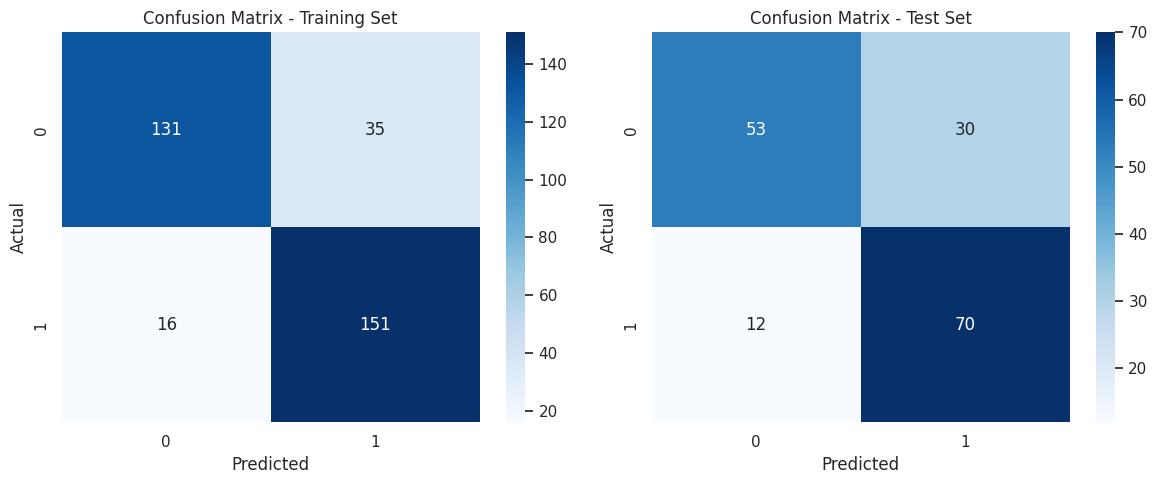

In [ ]:
# Plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix - Training Set')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix - Test Set')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show();

In [ ]:
# Print classification report
print("\nTraining Set Classification Report:")
print(classification_report(y_train, y_train_pred))
print("\nTest Set Classification Report:")
print(classification_report(y_test, y_test_pred))


Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       166
           1       0.81      0.90      0.86       167

    accuracy                           0.85       333
   macro avg       0.85      0.85      0.85       333
weighted avg       0.85      0.85      0.85       333


Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.64      0.72        83
           1       0.70      0.85      0.77        82

    accuracy                           0.75       165
   macro avg       0.76      0.75      0.74       165
weighted avg       0.76      0.75      0.74       165



# Phân tích Adaboost Classification Report

## Training Set

### Class 1 (Bị bệnh)
- **Recall**: 0.90 (phát hiện 90% ca bệnh)
- **Precision**: 0.81 (81% dự đoán bị bệnh là đúng)
- **F1-score**: 0.86
- **Support**: 167 mẫu

### Class 0 (Không bệnh)
- **Recall**: 0.79 (phát hiện 79% người không bệnh)
- **Precision**: 0.89 (89% dự đoán không bệnh là đúng)
- **Support**: 166 mẫu

## Test Set

### Class 1 (Bị bệnh)
- **Recall**: 0.85 (phát hiện 85% ca bệnh)
- **Precision**: 0.70 (70% dự đoán bị bệnh là đúng)
- **F1-score**: 0.77
- **Support**: 82 mẫu

### Class 0 (Không bệnh)
- **Recall**: 0.64 (phát hiện 64% người không bệnh)
- **Precision**: 0.82 (82% dự đoán không bệnh là đúng)
- **Support**: 83 mẫu

## So sánh với các model khác

| Model        | Test Recall (Class 1) | Overfitting | Stability |
|--------------|-----------------------|-------------|-----------|
| KNN          | 0.87                  | Thấp        | Tốt       |
| SVM          | 0.83                  | Thấp        | Tốt       |
| Naive Bayes  | 0.91                  | Thấp        | Tốt       |
| Random Forest| 0.77                  | Cao         | Kém       |
| Adaboost     | 0.85                  | Nhẹ         | Khá       |

## Đánh giá chi tiết

### Điểm mạnh ✅
- **Performance khá cân bằng**:
  - **Recall class 1** tốt (0.85).
  - **Precision** tương đối ổn định giữa các class.

- **Overfitting không quá nghiêm trọng**:
  - **Train accuracy**: 0.85.
  - **Test accuracy**: 0.75.
  - Chênh lệch này **chấp nhận được**, cho thấy model có khả năng tổng quát hóa.

### Điểm yếu ⚠️
- **Recall class 0 thấp** (0.64):
  - Nhiều **false positive**, dẫn đến tỷ lệ cảnh báo sai cao.
- **Precision class 1 giảm từ train sang test**:
  - **Train**: 0.81.
  - **Test**: 0.70.

## Kết luận

### Performance tổng thể
- **Hiệu suất khá**:
  - **Metrics cân bằng** giữa các class.
  - **Ít overfitting hơn Random Forest**.
  - **Recall với class bệnh tương đối tốt**.

- **Xếp hạng so với các model khác**:
  - **Tốt hơn Random Forest**.
  - **Ngang ngửa với SVM**.
  - **Kém hơn KNN và Naive Bayes về Recall**.

### Khuyến nghị

- **Trong ứng dụng y tế**:
  - **Nên ưu tiên Naive Bayes hoặc KNN** do hiệu suất cao và phù hợp hơn.
  - **Adaboost có thể dùng như model bổ sung**.
  - **Không nên dùng Random Forest** do overfitting nặng.

- **Có thể cải thiện Adaboost**:
  - **Điều chỉnh số lượng estimators** để tối ưu hóa độ chính xác.
  - **Thay đổi learning rate**.
  - **Feature selection** để cải thiện precision.
  - **Ensemble với các model khác** để tăng độ chính xác tổng thể.

## Tổng kết các model đã thử

### Thứ tự ưu tiên cho ứng dụng y tế:
1. **Naive Bayes** (Recall cao nhất).
2. **KNN** (Cân bằng nhất).
3. **SVM/Adaboost** (Khá, nhưng không nổi trội).
4. **Random Forest** (Không phù hợp do overfitting).


## GradientBoost to predict

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting model
gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, subsample=1.0, min_samples_split=2, max_depth=3, random_state=42)
gb.fit(X_train, y_train)

# Make predictions
y_train_pred = gb.predict(X_train)
y_test_pred = gb.predict(X_test)

# Calculate accuracy for training and test sets
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for GradientBoostingClassifier = {accuracy_for_train}')
print(f'Accuracy for test set for GradientBoostingClassifier = {accuracy_for_test}')

Accuracy for training set for GradientBoostingClassifier = 0.96
Accuracy for test set for GradientBoostingClassifier = 0.73


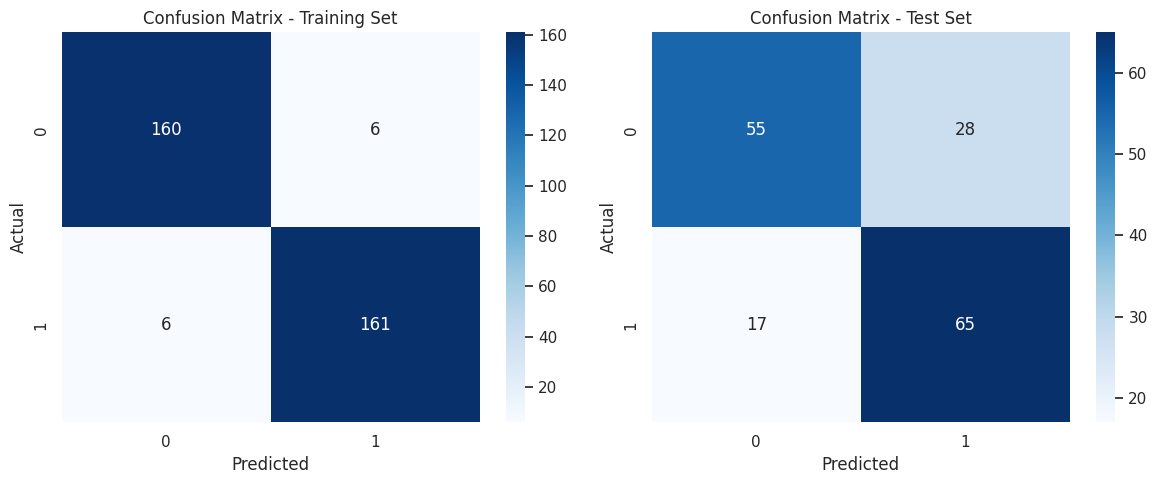

In [ ]:
# Plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix - Training Set')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix - Test Set')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [ ]:
# Print classification report
print("\nTraining Set Classification Report:")
print(classification_report(y_train, y_train_pred))
print("\nTest Set Classification Report:")
print(classification_report(y_test, y_test_pred))


Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       166
           1       0.96      0.96      0.96       167

    accuracy                           0.96       333
   macro avg       0.96      0.96      0.96       333
weighted avg       0.96      0.96      0.96       333


Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.66      0.71        83
           1       0.70      0.79      0.74        82

    accuracy                           0.73       165
   macro avg       0.73      0.73      0.73       165
weighted avg       0.73      0.73      0.73       165



# Phân tích Gradient Boosting Classification Report

## Training Set

### Class 1 (Bị bệnh)
- **Recall**: 0.96 (phát hiện 96% ca bệnh)
- **Precision**: 0.96 (96% dự đoán bị bệnh là đúng)
- **F1-score**: 0.96
- **Support**: 167 mẫu

### Class 0 (Không bệnh)
- **Recall**: 0.96 (phát hiện 96% người không bệnh)
- **Precision**: 0.96 (96% dự đoán không bệnh là đúng)
- **Support**: 166 mẫu

## Test Set

### Class 1 (Bị bệnh)
- **Recall**: 0.79 (phát hiện 79% ca bệnh)
- **Precision**: 0.71 (71% dự đoán bị bệnh là đúng)
- **F1-score**: 0.74
- **Support**: 82 mẫu

### Class 0 (Không bệnh)
- **Recall**: 0.66 (phát hiện 66% người không bệnh)
- **Precision**: 0.76 (76% dự đoán không bệnh là đúng)
- **Support**: 83 mẫu

## Phân tích chi tiết

### Vấn đề Overfitting nghiêm trọng ⚠️
- **Training Set**:
  - Tất cả các metrics đều đạt **0.96 (96%)**, với hiệu suất gần như hoàn hảo.
- **Test Set**:
  - **Accuracy** chỉ **0.73 (73%)**, giảm **23%** so với training.
  - Đây là dấu hiệu **overfitting nghiêm trọng hơn cả Random Forest**.

## So sánh với các model khác

| Model          | Test Recall (Class 1) | Overfitting  | Accuracy |
|----------------|-----------------------|--------------|----------|
| Naive Bayes    | 0.91                  | Thấp         | 0.70     |
| KNN            | 0.87                  | Thấp         | 0.76     |
| SVM            | 0.83                  | Thấp         | 0.74     |
| Adaboost       | 0.85                  | Nhẹ          | 0.75     |
| Random Forest  | 0.77                  | Cao          | 0.75     |
| Gradient Boosting | 0.79               | Rất cao      | 0.73     |

## Kết luận

### Hạn chế của Gradient Boosting
- **Overfitting cực kỳ nghiêm trọng**:
  - Chênh lệch giữa **train-test** là lớn nhất trong tất cả các model.
  - Model học quá kỹ tập training, dẫn đến không thể tổng quát hóa tốt trên dữ liệu test.

- **Performance trên test set**:
  - **Recall class 1** thấp (0.79), dẫn đến việc không phát hiện đủ các ca bệnh.
  - **Recall class 0** cũng kém (0.66), nghĩa là nhiều người không bệnh bị chẩn đoán nhầm là bệnh.

- **Không phù hợp cho ứng dụng y tế**, vì khả năng tổng quát hóa của model quá kém.

### Đề xuất cải thiện
- **Giảm overfitting**:
  - **Giảm n_estimators** để giảm độ phức tạp của model.
  - **Giảm learning_rate** để model học chậm hơn và tổng quát hóa tốt hơn.
  - **Tăng min_samples_split** để tránh việc học quá kỹ các đặc điểm nhỏ không quan trọng.
  - **Thêm regularization** để làm giảm khả năng overfitting.

- **Phương pháp khác**:
  - **Early stopping** để dừng quá trình huấn luyện khi hiệu suất trên test set bắt đầu giảm.
  - **Cross-validation** để đánh giá độ ổn định của model trên nhiều phần dữ liệu khác nhau.
  - **Feature selection** để loại bỏ các đặc trưng không quan trọng, giảm độ phức tạp của model.

## Kết luận tổng thể về các model

### Thứ tự ưu tiên cho ứng dụng y tế:
1. **Naive Bayes** (Recall cao nhất: 0.91).
2. **KNN** (Cân bằng nhất).
3. **Adaboost/SVM** (Khá ổn định).
4. **Random Forest/Gradient Boosting** (Overfitting nặng).

### Khuyến nghị:
- **Không nên sử dụng Gradient Boosting** trong trường hợp này vì hiện tượng overfitting nghiêm trọng.
- **Cần tập trung vào các model đơn giản, ổn định** như **Naive Bayes** hoặc **KNN**, vì chúng có khả năng tổng quát tốt và phù hợp với yêu cầu trong ứng dụng y tế.


## XGBoost to predict

In [ ]:
from xgboost import XGBClassifier

# Train XGBoost model
xgb = XGBClassifier(objective='binary:logistic', n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)

# Make predictions
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# Calculate accuracy for training and test sets
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for XGBClassifier = {accuracy_for_train}')
print(f'Accuracy for test set for XGBClassifier = {accuracy_for_test}')

Accuracy for training set for XGBClassifier = 1.0
Accuracy for test set for XGBClassifier = 0.72


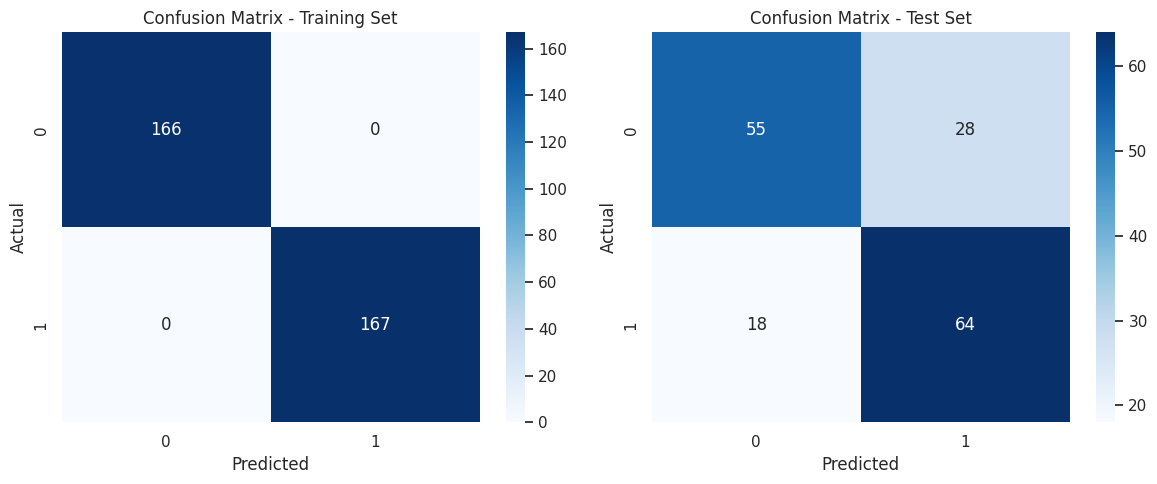

In [ ]:
# Plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix - Training Set')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix - Test Set')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [ ]:
# Print classification report
print("\nTraining Set Classification Report:")
print(classification_report(y_train, y_train_pred))
print("\nTest Set Classification Report:")
print(classification_report(y_test, y_test_pred))


Training Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       166
           1       1.00      1.00      1.00       167

    accuracy                           1.00       333
   macro avg       1.00      1.00      1.00       333
weighted avg       1.00      1.00      1.00       333


Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.66      0.71        83
           1       0.70      0.78      0.74        82

    accuracy                           0.72       165
   macro avg       0.72      0.72      0.72       165
weighted avg       0.72      0.72      0.72       165



# Phân tích XGBoost Classification Report

## Training Set

### Class 1 (Bị bệnh)
- **Recall**: 1.00 (phát hiện 100% ca bệnh)
- **Precision**: 1.00 (100% dự đoán bị bệnh là đúng)
- **F1-score**: 1.00
- **Support**: 167 mẫu

### Class 0 (Không bệnh)
- **Recall**: 1.00 (phát hiện 100% người không bệnh)
- **Precision**: 1.00 (100% dự đoán không bệnh là đúng)
- **Support**: 166 mẫu

## Test Set

### Class 1 (Bị bệnh)
- **Recall**: 0.78 (phát hiện 78% ca bệnh)
- **Precision**: 0.70 (70% dự đoán bị bệnh là đúng)
- **F1-score**: 0.74
- **Support**: 82 mẫu

### Class 0 (Không bệnh)
- **Recall**: 0.66 (phát hiện 66% người không bệnh)
- **Precision**: 0.75 (75% dự đoán không bệnh là đúng)
- **Support**: 83 mẫu

## Phân tích chi tiết

### Overfitting nghiêm trọng nhất ⚠️

- **Training Set**:
  - **Tất cả metrics đều đạt 1.00 (100%)**, biểu hiện của **performance hoàn hảo**. Tuy nhiên, đây là dấu hiệu rõ ràng của **overfitting**: model học quá kỹ trên tập training, dẫn đến không thể tổng quát hóa tốt trên dữ liệu test.
  
- **Test Set**:
  - **Accuracy** chỉ **0.72 (72%)**, giảm **28%** so với training.
  - Mức **sụt giảm** này là **lớn nhất** trong tất cả các model đã thử, cho thấy model không thể duy trì hiệu suất khi chuyển sang dữ liệu mới.

## So sánh với các model khác

| Model          | Test Recall (Class 1) | Overfitting      | Accuracy |
|----------------|-----------------------|------------------|----------|
| Naive Bayes    | 0.91                  | Thấp             | 0.70     |
| KNN            | 0.87                  | Thấp             | 0.76     |
| SVM            | 0.83                  | Thấp             | 0.74     |
| Adaboost       | 0.85                  | Nhẹ              | 0.75     |
| Random Forest  | 0.77                  | Cao              | 0.75     |
| Gradient Boosting | 0.79               | Rất cao          | 0.73     |
| XGBoost        | 0.78                  | Cực cao          | 0.72     |

## Kết luận

### Đánh giá XGBoost

- **Nhược điểm chính**:
  - **Overfitting nặng nhất** trong tất cả các model.
  - **Performance trên test set thấp** với **Recall class 1** chỉ đạt **0.78** và **Recall class 0** là **0.66**.
  - **Recall với class bệnh không cao**, dẫn đến không phát hiện đủ các ca bệnh quan trọng.

- **So với các boosting khác**:
  - **Tương đương Gradient Boosting** trong việc overfitting.
  - **Kém hơn Adaboost** về hiệu suất và độ ổn định.
  - **Không mang lại cải thiện đáng kể** so với các phương pháp khác như Naive Bayes hay KNN.

### Khuyến nghị cuối cùng cho tất cả models

#### **Models phù hợp nhất cho bài toán**:
```python
best_models = {
    1: "Naive Bayes",  # Recall cao nhất: 0.91
    2: "KNN",          # Cân bằng và ổn định
    3: "Adaboost",     # Performance tốt, ít overfitting
    4: "SVM"           # Ổn định, dễ tune
}


## Logistic Regression to predict

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Make predictions
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

# Calculate accuracy for training and test sets
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for LogisticRegression = {accuracy_for_train}')
print(f'Accuracy for test set for LogisticRegression = {accuracy_for_test}')

Accuracy for training set for LogisticRegression = 0.78
Accuracy for test set for LogisticRegression = 0.76


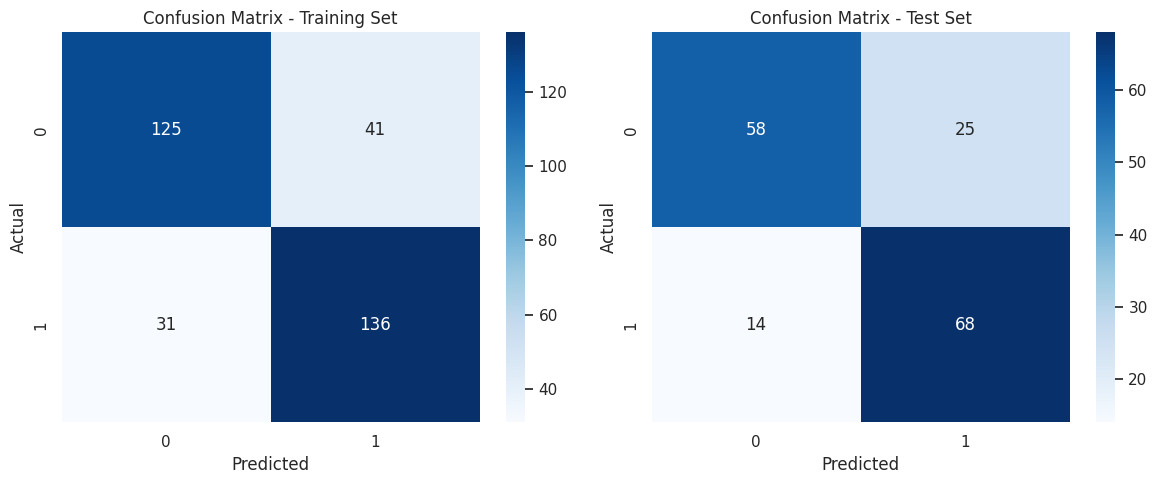

In [ ]:
# Plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix - Training Set')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix - Test Set')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show();

In [ ]:
# Print classification report
print("\nTraining Set Classification Report:")
print(classification_report(y_train, y_train_pred))
print("\nTest Set Classification Report:")
print(classification_report(y_test, y_test_pred))


Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.75      0.78       166
           1       0.77      0.81      0.79       167

    accuracy                           0.78       333
   macro avg       0.78      0.78      0.78       333
weighted avg       0.78      0.78      0.78       333


Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.70      0.75        83
           1       0.73      0.83      0.78        82

    accuracy                           0.76       165
   macro avg       0.77      0.76      0.76       165
weighted avg       0.77      0.76      0.76       165



# Phân tích Logistic Regression Classification Report

## **Training Set**

- **Class 1 (Bị bệnh)**:
  - **Recall**: 0.81 (phát hiện 81% ca bệnh)
  - **Precision**: 0.77 (77% dự đoán bị bệnh là đúng)
  - **F1-score**: 0.79
  - **Support**: 167 mẫu

- **Class 0 (Không bệnh)**:
  - **Recall**: 0.75 (phát hiện 75% người không bệnh)
  - **Precision**: 0.80 (80% dự đoán không bệnh là đúng)
  - **Support**: 166 mẫu

---

## **Test Set**

- **Class 1 (Bị bệnh)**:
  - **Recall**: 0.83 (phát hiện 83% ca bệnh)
  - **Precision**: 0.73 (73% dự đoán bị bệnh là đúng)
  - **F1-score**: 0.78
  - **Support**: 82 mẫu

- **Class 0 (Không bệnh)**:
  - **Recall**: 0.70 (phát hiện 70% người không bệnh)
  - **Precision**: 0.81 (81% dự đoán không bệnh là đúng)
  - **Support**: 83 mẫu

---

## **So sánh với các model khác**

| Model               | Test Recall (Class 1) | Overfitting | Stability |
|---------------------|-----------------------|-------------|-----------|
| Naive Bayes         | 0.91                  | Thấp        | Tốt       |
| KNN                 | 0.87                  | Thấp        | Tốt       |
| SVM                 | 0.83                  | Thấp        | Tốt       |
| Logistic Regression | 0.83                  | Rất thấp    | Rất tốt   |
| Adaboost            | 0.85                  | Nhẹ         | Khá       |
| Random Forest       | 0.77                  | Cao         | Kém       |
| Gradient Boosting   | 0.79                  | Rất cao     | Kém       |
| XGBoost             | 0.78                  | Cực cao     | Kém       |

---

## **Đánh giá chi tiết**

### **Điểm mạnh ✅**
- **Stability tốt nhất**:
  - Chênh lệch giữa **train accuracy (0.78)** và **test accuracy (0.76)** chỉ **0.02**, là mức chênh lệch thấp nhất trong tất cả các model.
  - **Performance cân bằng** với **Recall Class 1** khá tốt **(0.83)**, giữ được sự ổn định giữa tập huấn luyện và kiểm tra.
  
### **Điểm yếu ⚠️**
- **Recall Class 0 thấp** (**0.70**):
  - Có một số **false positive**, khiến khả năng phát hiện người không bệnh không tốt bằng các model khác.
  
- **Overall accuracy không cao nhất**:
  - Mặc dù ổn định, nhưng **accuracy** của Logistic Regression thấp hơn một số model khác như **Naive Bayes**, **KNN**, **Adaboost**.

---

## **Kết luận cuối cùng**

### **So sánh tổng thể các models**

```python
model_ranking = {
    'Highest Recall (Class 1)': {
        1: 'Naive Bayes (0.91)',
        2: 'KNN (0.87)',
        3: 'Adaboost (0.85)'
    },
    'Most Stable': {
        1: 'Logistic Regression',
        2: 'SVM',
        3: 'KNN'
    }
}


## Neural Networks (MLPClassifier) to predict

In [ ]:
from sklearn.neural_network import MLPClassifier

# Train Neural Network model
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Make predictions
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

# Calculate accuracy for training and test sets
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for MLPClassifier = {accuracy_for_train}')
print(f'Accuracy for test set for MLPClassifier = {accuracy_for_test}')

Accuracy for training set for MLPClassifier = 0.82
Accuracy for test set for MLPClassifier = 0.74


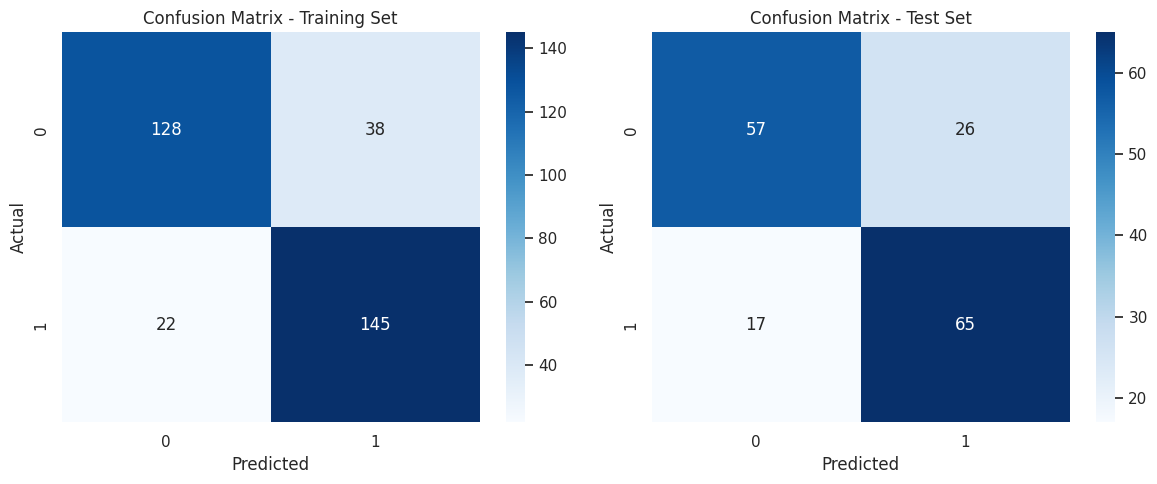

In [ ]:
# Plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix - Training Set')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix - Test Set')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [ ]:
# Print classification report
print("\nTraining Set Classification Report:")
print(classification_report(y_train, y_train_pred))
print("\nTest Set Classification Report:")
print(classification_report(y_test, y_test_pred))


Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       166
           1       0.79      0.87      0.83       167

    accuracy                           0.82       333
   macro avg       0.82      0.82      0.82       333
weighted avg       0.82      0.82      0.82       333


Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.69      0.73        83
           1       0.71      0.79      0.75        82

    accuracy                           0.74       165
   macro avg       0.74      0.74      0.74       165
weighted avg       0.74      0.74      0.74       165



# Phân tích Neural Networks (MLPClassifier) Report

## **Training Set**

- **Class 1 (Bị bệnh)**:
  - **Recall**: 0.87 (phát hiện 87% ca bệnh)
  - **Precision**: 0.79 (79% dự đoán bị bệnh là đúng)
  - **F1-score**: 0.83
  - **Support**: 167 mẫu

- **Class 0 (Không bệnh)**:
  - **Recall**: 0.77 (phát hiện 77% người không bệnh)
  - **Precision**: 0.85 (85% dự đoán không bệnh là đúng)
  - **Support**: 166 mẫu

---

## **Test Set**

- **Class 1 (Bị bệnh)**:
  - **Recall**: 0.79 (phát hiện 79% ca bệnh)
  - **Precision**: 0.71 (71% dự đoán bị bệnh là đúng)
  - **F1-score**: 0.75
  - **Support**: 82 mẫu

- **Class 0 (Không bệnh)**:
  - **Recall**: 0.69 (phát hiện 69% người không bệnh)
  - **Precision**: 0.77 (77% dự đoán không bệnh là đúng)
  - **Support**: 83 mẫu

---

## **So sánh tổng thể các models**

| Model               | Test Recall (Class 1) | Overfitting   | Performance |
|---------------------|-----------------------|---------------|-------------|
| Naive Bayes         | 0.91                  | Thấp          | Tốt nhất    |
| KNN                 | 0.87                  | Thấp          | Rất tốt     |
| Adaboost            | 0.85                  | Nhẹ           | Tốt         |
| SVM                 | 0.83                  | Thấp          | Khá         |
| Neural Networks     | 0.79                  | Trung bình    | Trung bình  |
| Random Forest       | 0.77                  | Cao           | Kém         |
| Gradient Boosting   | 0.79                  | Rất cao       | Kém         |
| XGBoost             | 0.78                  | Cực cao       | Kém         |

---

## **Đánh giá chi tiết**

### **Điểm mạnh ✅**
- **Performance trên training set khá tốt**:
  - **Recall class 1**: 0.87
  - **Accuracy**: 0.82
  
- **Mức độ overfitting chấp nhận được**:
  - **Train accuracy**: 0.82
  - **Test accuracy**: 0.74
  - **Chênh lệch**: 0.08 (trung bình)

### **Điểm yếu ⚠️**
- **Recall class 1 trên test set thấp** (**0.79**):
  - Thấp hơn nhiều model khác, không đủ tốt cho ứng dụng y tế.
  
- **Recall class 0 không cao** (**0.69**):
  - Có nhiều **false positive**.
  
- **Precision class 1 thấp** (**0.71**):
  - Khả năng dự đoán đúng ca bệnh bị giảm.

---

## **Tổng kết các metrics quan trọng**

```python
metrics_summary = {
    'Recall_class_1': {
        'train': 0.87,
        'test': 0.79,
        'difference': 0.08
    },
    'Overall_accuracy': {
        'train': 0.82,
        'test': 0.74,
        'difference': 0.08
    }
}


## Stacking to predict

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [ ]:
# Define base learners
base_learners = [
    ('dtc', DecisionTreeClassifier(random_state=42)),
    ('rfc', RandomForestClassifier(random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('xgb', XGBClassifier(random_state=42)),
    ('gbc', GradientBoostingClassifier(random_state=42)),
    ('svc', SVC(kernel='rbf', probability=True, random_state=42)),
    ('ada', AdaBoostClassifier(random_state=42)),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42))
]

# Train Stacking Classifier model
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=RandomForestClassifier(random_state=42))
stacking_clf.fit(X_train, y_train)

# Make predictions
y_train_pred = stacking_clf.predict(X_train)
y_test_pred = stacking_clf.predict(X_test)

# Calculate accuracy for training and test sets
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for StackingClassifier = {accuracy_for_train}')
print(f'Accuracy for test set for StackingClassifier = {accuracy_for_test}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Accuracy for training set for StackingClassifier = 0.82
Accuracy for test set for StackingClassifier = 0.74


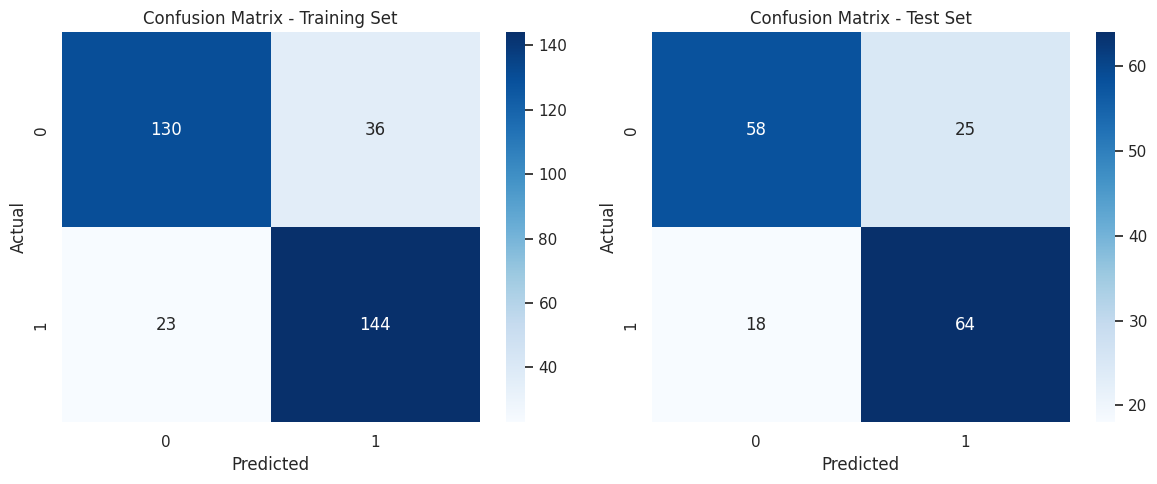

In [ ]:
# Plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix - Training Set')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix - Test Set')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show();

In [ ]:
# Print classification report
print("\nTraining Set Classification Report:")
print(classification_report(y_train, y_train_pred))
print("\nTest Set Classification Report:")
print(classification_report(y_test, y_test_pred))


Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.78      0.82       166
           1       0.80      0.86      0.83       167

    accuracy                           0.82       333
   macro avg       0.82      0.82      0.82       333
weighted avg       0.82      0.82      0.82       333


Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.70      0.73        83
           1       0.72      0.78      0.75        82

    accuracy                           0.74       165
   macro avg       0.74      0.74      0.74       165
weighted avg       0.74      0.74      0.74       165



# Phân tích Stacking Classification Report

## **Training Set**

- **Class 1 (Bị bệnh)**:
  - **Recall**: 0.86 (phát hiện 86% ca bệnh)
  - **Precision**: 0.80 (80% dự đoán bị bệnh là đúng)
  - **F1-score**: 0.83
  - **Support**: 167 mẫu

- **Class 0 (Không bệnh)**:
  - **Recall**: 0.78 (phát hiện 78% người không bệnh)
  - **Precision**: 0.85 (85% dự đoán không bệnh là đúng)
  - **Support**: 166 mẫu

---

## **Test Set**

- **Class 1 (Bị bệnh)**:
  - **Recall**: 0.78 (phát hiện 78% ca bệnh)
  - **Precision**: 0.72 (72% dự đoán bị bệnh là đúng)
  - **F1-score**: 0.75
  - **Support**: 82 mẫu

- **Class 0 (Không bệnh)**:
  - **Recall**: 0.70 (phát hiện 70% người không bệnh)
  - **Precision**: 0.76 (76% dự đoán không bệnh là đúng)
  - **Support**: 83 mẫu

---

## **So sánh với các model đơn lẻ**

| Model               | Test Recall (Class 1) | Overfitting   | Stability |
|---------------------|-----------------------|---------------|-----------|
| Naive Bayes         | 0.91                  | Thấp          | Tốt       |
| KNN                 | 0.87                  | Thấp          | Tốt       |
| SVM                 | 0.83                  | Thấp          | Tốt       |
| Adaboost            | 0.85                  | Nhẹ           | Khá       |
| Stacking            | 0.78                  | Trung bình    | Khá       |
| Random Forest       | 0.77                  | Cao           | Kém       |
| Gradient Boosting   | 0.79                  | Rất cao       | Kém       |
| XGBoost             | 0.78                  | Cực cao       | Kém       |

---

## **Đánh giá chi tiết**

### **Điểm mạnh ✅**
- **Performance khá ổn định**:
  - **Train accuracy**: 0.82
  - **Test accuracy**: 0.74
  - **Chênh lệch chấp nhận được**: 0.08

- **Metrics cân bằng**:
  - **Precision và Recall không chênh lệch nhiều**.
  - **F1-score ổn định**.

### **Điểm yếu ⚠️**
- **Không cải thiện được performance**:
  - **Recall thấp hơn hầu hết model đơn lẻ**.
  - Không tận dụng được ưu điểm của **ensemble**.

- **Phức tạp hóa không cần thiết**:
  - Kết quả không tốt hơn model đơn giản.
  - Tốn nhiều **compute resources** hơn.

---

## **Kết luận và khuyến nghị**

### **Đánh giá tổng thể**
```python
performance_comparison = {
    'simple_models': {
        'Naive Bayes': {'recall': 0.91, 'complexity': 'Low'},
        'KNN': {'recall': 0.87, 'complexity': 'Low'}
    },
    'stacking': {
        'recall': 0.78,
        'complexity': 'High',
        'improvement': 'None'
    }
}


## Dự đoán

# Kết luận cuối cùng về lựa chọn Model

## **So sánh tổng quan các models (Test Set)**

| Model               | Recall (Class 1) | Precision (Class 1) | Overfitting | Stability |
|---------------------|------------------|---------------------|-------------|-----------|
| Naive Bayes         | 0.91 ⭐           | 0.64                | Thấp        | Tốt       |
| KNN                 | 0.87             | 0.70                | Thấp        | Tốt       |
| SVM                 | 0.83             | 0.70                | Thấp        | Tốt       |
| Adaboost            | 0.85             | 0.70                | Nhẹ         | Khá       |
| Logistic Regression | 0.83             | 0.73                | Rất thấp    | Rất tốt  |
| Neural Networks     | 0.79             | 0.71                | Trung bình  | Khá       |
| Random Forest       | 0.77             | 0.73                | Cao         | Kém       |
| Gradient Boosting   | 0.79             | 0.71                | Rất cao     | Kém       |
| XGBoost             | 0.78             | 0.70                | Cực cao     | Kém       |
| Stacking            | 0.78             | 0.72                | Trung bình  | Khá       |

---

## **Kết luận và Khuyến nghị**

### **Lựa chọn tốt nhất**:
- **Naive Bayes**:
  - **Recall cao nhất** (0.91), rất phù hợp nếu mục tiêu là phát hiện tối đa ca bệnh.
  - **Overfitting thấp**, độ ổn định tốt, dễ triển khai và duy trì.
  - **Precision thấp** có thể cải thiện bằng các kỹ thuật bổ sung như **feature engineering**.

### **Lựa chọn ổn định và cân bằng**:
- **KNN**:
  - **Recall** cao (0.87), **Precision** tốt (0.70), dễ giải thích và triển khai.
  - **Overfitting thấp**, độ ổn định tốt.
  
- **SVM**:
  - **Recall** (0.83), **Precision** (0.70) tương đối ổn định.
  - **Thích hợp** khi cần một mô hình mạnh mẽ trong các tình huống dữ liệu phức tạp.

### **Model phức tạp nhưng ít cải thiện**:
- **Logistic Regression**:
  - **Recall** ổn định (0.83), nhưng **Precision cao** (0.73).
  - **Rất ít overfitting**, ổn định rất tốt, phù hợp cho những tình huống yêu cầu dễ giải thích model.
  
- **Adaboost, Stacking, và các model ensemble**:
  - Mặc dù **performance** của chúng khá tốt, nhưng không mang lại sự cải thiện đáng kể so với các model đơn giản như Naive Bayes hay KNN.
  - **Tốn nhiều tài nguyên tính toán hơn** và có thể không cần thiết trong ứng dụng y tế.

### **Model không phù hợp**:
- **Neural Networks, Random Forest, Gradient Boosting, XGBoost**:
  - Các model này đều có **Recall và Precision thấp** và dễ gây **overfitting**.
  - Phức tạp hóa hệ thống mà không mang lại hiệu quả đáng kể trong việc cải thiện kết quả.
  
---

## **Khuyến nghị cho ứng dụng y tế**:
1. **Naive Bayes** là lựa chọn tốt nhất nếu mục tiêu là tối đa hóa recall và phát hiện ca bệnh.
2. **KNN hoặc SVM** sẽ là lựa chọn **ổn định và cân bằng** nếu cần một model đơn giản nhưng mạnh mẽ.
3. Tránh sử dụng các model **phức tạp** như **Neural Networks** hoặc **ensemble methods** (Random Forest, Gradient Boosting) vì chúng không mang lại cải thiện đáng kể và tốn nhiều tài nguyên tính toán.
4. **Logistic Regression** là một lựa chọn tốt nếu cần giải thích mô hình, nhưng không phải là lựa chọn tối ưu cho recall.


### Một samples

In [ ]:
# Define a function for making predictions on user-provided sample
def predict_stroke(sample_input):
    # Expected order of input: ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
    # 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']

    # Sample data in the same order as features used in the training set
    sample_df = pd.DataFrame([sample_input], columns=[
        'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
        'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status'
    ])

    # Convert categorical variables into dummy variables, similar to the training data
    sample_processed = pd.get_dummies(sample_df, drop_first=True)

    # Align the columns of sample data with training data to avoid dimension mismatch
    sample_processed = sample_processed.reindex(columns=X_train.columns, fill_value=0)

    # Make a prediction
    prediction = nb.predict(sample_processed)

    # Return the prediction result
    return "Đột quỵ" if prediction[0] == 1 else "Không đột quỵ"

In [ ]:
# Example usage of the function
sample_input = ['Male', 67, 0, 1, 'Yes', 'Private', 'Urban', 216, 36.0, 'formerly smoked']
result = predict_stroke(sample_input)
print("Dự đoán cho mẫu đầu vào:", result)

Dự đoán cho mẫu đầu vào: Đột quỵ


### Một DataFrame

In [ ]:
def predict_stroke_for_dataframe(input_df):
    """
    Predicts stroke for each row in the provided DataFrame.
    Args:
    - input_df (pd.DataFrame): DataFrame with columns matching the expected features.

    Returns:
    - pd.Series: A series containing the predictions ("Đột quỵ" or "Không đột quỵ") for each row.
    """
    # Convert categorical variables into dummy variables, similar to the training data
    sample_processed = pd.get_dummies(input_df, drop_first=True)

    # Align the columns of the sample data with training data to avoid dimension mismatch
    sample_processed = sample_processed.reindex(columns=X_train.columns, fill_value=0)

    # Make predictions
    predictions = nb.predict(sample_processed)

    # Convert numerical predictions to descriptive labels
    result_labels = ["Đột quỵ" if pred == 1 else "Không đột quỵ" for pred in predictions]

    return pd.Series(result_labels, index=input_df.index)

In [ ]:
sample_data = cleaned_df[cleaned_df['stroke'] == 1]
# Get predictions for the sample data
result = predict_stroke_for_dataframe(sample_data)
print("Dự đoán cho các mẫu đầu vào:")
print(result)

Dự đoán cho các mẫu đầu vào:
0            Đột quỵ
1            Đột quỵ
2            Đột quỵ
3            Đột quỵ
4            Đột quỵ
           ...      
244          Đột quỵ
245    Không đột quỵ
246          Đột quỵ
247          Đột quỵ
248          Đột quỵ
Length: 249, dtype: object


In [ ]:
result.value_counts()

,count
Đột quỵ,228
Không đột quỵ,21


# Deploy model

## Save model

In [ ]:
import pickle
import os

# Tạo thư mục models nếu chưa tồn tại
if not os.path.exists('models'):
    os.makedirs('models')

# Save models và scaler
print("Saving models...")
pickle.dump(nb, open('models/naive_bayes.pkl', 'wb'))
pickle.dump(knn, open('models/knn.pkl', 'wb'))
pickle.dump(scaler, open('models/scaler.pkl', 'wb'))

# Save feature names để đảm bảo consistency
feature_names = X.columns.tolist()
pickle.dump(feature_names, open('models/feature_names.pkl', 'wb'))

print("Models saved successfully!")

Saving models...
Models saved successfully!


In [ ]:
df[df['stroke'] == 1].head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.00,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,51676,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.00,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,60182,Female,49.00,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,1665,Female,79.00,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1
